# 1. Trying random animated code to see if it works

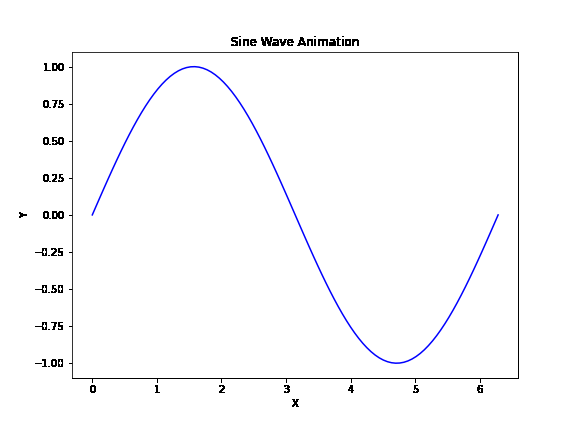

<Figure size 576x432 with 0 Axes>

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# Create a plot
plt.figure(figsize=(8, 6))
plt.title('Sine Wave Animation')
plt.xlabel('X')
plt.ylabel('Y')

# Create frames for animation
frames = 50
for i in range(frames):
    plt.plot(x, np.sin(x + i / frames * 2 * np.pi), color='blue')
    plt.savefig(f'frame_{i}.png')
    plt.clf()

# Combine frames into a GIF
import imageio
images = [imageio.imread(f'frame_{i}.png') for i in range(frames)]
imageio.mimsave('sine_wave_animation.gif', images)

# Display the GIF
from IPython.display import Image
Image(filename='sine_wave_animation.gif')


# 2.  Trying simple centroid based clustering 

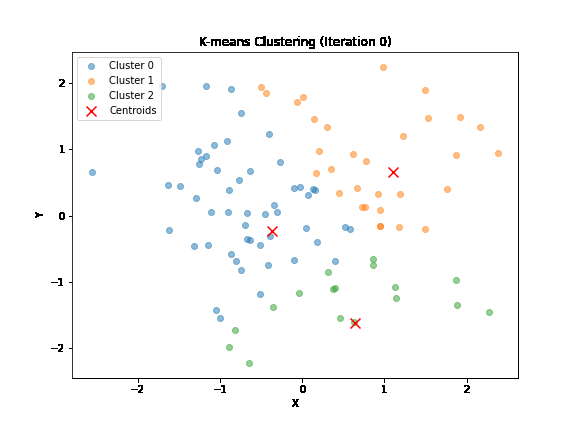

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to assign each data point to the nearest centroid
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

# Function to update centroids based on the mean of data points assigned to each cluster
def update_centroids(data, clusters, k):
    centroids = []
    for i in range(k):
        cluster_points = [data[j] for j in range(len(data)) if clusters[j] == i]
        new_centroid = np.mean(cluster_points, axis=0)
        centroids.append(new_centroid)
    return centroids

# Generate random data points
np.random.seed(0)
data = np.random.randn(100, 2)

# Number of clusters
k = 3

# Maximum number of iterations
max_iter = 10

# Initialize centroids
centroids = np.random.randn(k, 2)

# Create frames for animation
for i in range(max_iter + 1):
    plt.figure(figsize=(8, 6))
    plt.title(f'K-means Clustering (Iteration {i})')
    plt.xlabel('X')
    plt.ylabel('Y')
    
    # Assign data points to clusters
    clusters = assign_clusters(data, centroids)
    
    # Plot data points
    for cluster_id in range(k):
        cluster_points = np.array([data[j] for j in range(len(data)) if clusters[j] == cluster_id])
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', alpha=0.5)
    
    # Convert centroids to numpy array
    centroids = np.array(centroids)
    
    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
    
    # Save frame
    plt.legend()
    plt.savefig(f'frame_{i}.png')
    plt.close()

    # Update centroids for the next iteration
    if i < max_iter:
        centroids = update_centroids(data, clusters, k)

# Combine frames into a GIF
import imageio
images = [imageio.imread(f'frame_{i}.png') for i in range(max_iter + 1)]
imageio.mimsave('kmeans_clustering_animation.gif', images)

# Display the GIF
from IPython.display import Image
Image(filename='kmeans_clustering_animation.gif')


# 3. Optimising for number of clusters

C:\Users\aakas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


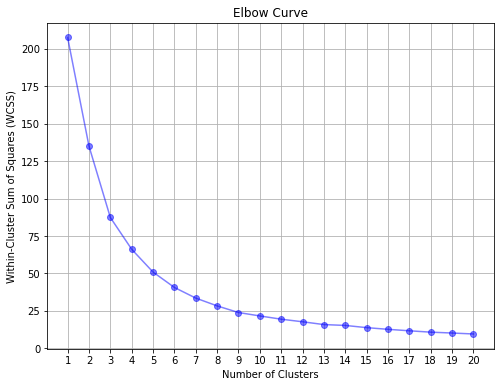

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# # Generate random data points
# np.random.seed(0)
# data = np.random.randn(100, 2)

# Maximum number of clusters to test
max_clusters = 20

# Calculate WCSS for different values of k
wcss_values = []
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), wcss_values, marker='o', linestyle='-', color='blue', alpha=0.5)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)

plt.show()


interactive(children=(IntSlider(value=0, description='frame', max=10), Output()), _dom_classes=('widget-intera…

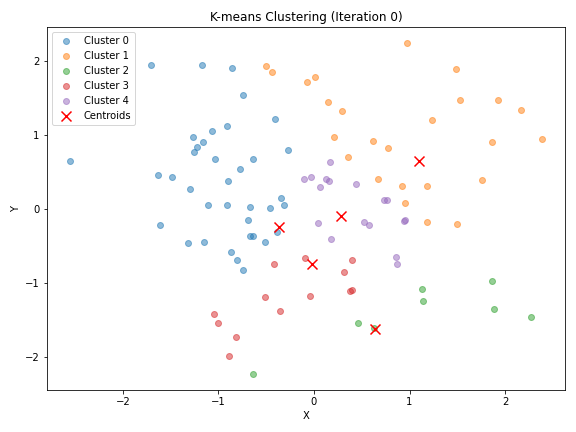

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import ipywidgets as widgets
from IPython.display import display
from IPython.display import Image

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to assign each data point to the nearest centroid
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

# Function to update centroids based on the mean of data points assigned to each cluster
def update_centroids(data, clusters, k):
    centroids = []
    for i in range(k):
        cluster_points = [data[j] for j in range(len(data)) if clusters[j] == i]
        new_centroid = np.mean(cluster_points, axis=0)
        centroids.append(new_centroid)
    return centroids

# Generate random data points
np.random.seed(0)
data = np.random.randn(100, 2)

# Number of clusters
k = 5

# Maximum number of iterations
max_iter = 10

# Initialize centroids
centroids = np.random.randn(k, 2)

# Create frames for animation
frames = []
for i in range(max_iter + 1):
    plt.figure(figsize=(8, 6))
    plt.title(f'K-means Clustering (Iteration {i})')
    plt.xlabel('X')
    plt.ylabel('Y')
    
    # Assign data points to clusters
    clusters = assign_clusters(data, centroids)
    
    # Plot data points
    for cluster_id in range(k):
        cluster_points = np.array([data[j] for j in range(len(data)) if clusters[j] == cluster_id])
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', alpha=0.5)
    
    # Convert centroids to numpy array
    centroids = np.array(centroids)
    
    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
    
    plt.legend()
    plt.tight_layout()
    
    # Save frame
    filename = f'frame_{i}.png'
    plt.savefig(filename)
    plt.close()
    
    # Add frame to list
    frames.append(imageio.imread(filename))

    # Update centroids for the next iteration
    if i < max_iter:
        centroids = update_centroids(data, clusters, k)

# Combine frames into a GIF with a duration of 200 milliseconds per frame (5 frames per second)
imageio.mimsave('kmeans_clustering_animation.gif', frames, duration=200)

# Display the GIF
def display_animation(frame):
    filename = f'frame_{frame}.png'
    return Image(filename=filename)

# Create a slider widget
frame_slider = widgets.IntSlider(min=0, max=max_iter, step=1, value=0)

# Use the interact function to link the slider and the display function
widgets.interact(display_animation, frame=frame_slider)

# Show the GIF animation initially
display_animation(0)


interactive(children=(IntSlider(value=0, description='frame', max=10), Output()), _dom_classes=('widget-intera…

C:\Users\aakas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


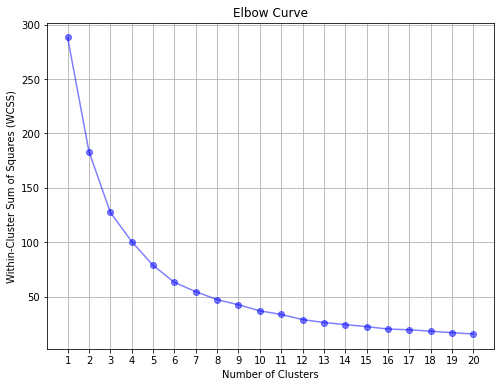

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import ipywidgets as widgets
from IPython.display import display
from IPython.display import Image

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to assign each data point to the nearest centroid
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

# Function to update centroids based on the mean of data points assigned to each cluster
def update_centroids(data, clusters, k):
    centroids = []
    for i in range(k):
        cluster_points = [data[j] for j in range(len(data)) if clusters[j] == i]
        new_centroid = np.mean(cluster_points, axis=0)
        centroids.append(new_centroid)
    return centroids

# Generate random data points
np.random.seed()
data = np.random.randn(150, 2)

# Number of clusters
k = 5

# Maximum number of iterations
max_iter = 10

# Initialize centroids
centroids = np.random.randn(k, 2)


# Create frames for animation
frames = []
for i in range(max_iter + 1):
    plt.figure(figsize=(8, 6))
    plt.title(f'K-means Clustering (Iteration {i})')
    plt.xlabel('X')
    plt.ylabel('Y')
    
    # Assign data points to clusters
    clusters = assign_clusters(data, centroids)
    
    # Plot data points and centroids
    for cluster_id in range(k):
        cluster_points = np.array([data[j] for j in range(len(data)) if clusters[j] == cluster_id])
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', alpha=0.5)
    
    # Convert centroids to numpy array
    centroids = np.array(centroids)
    
    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
    
    # Plot lines connecting data points to centroids with 60% transparency
    for j, point in enumerate(data):
        centroid = centroids[clusters[j]]
        plt.plot([point[0], centroid[0]], [point[1], centroid[1]], color='lightgray', alpha=0.6)

        # Highlight the nodes being used for calculating distances
#         plt.scatter([point[0], centroid[0]], [point[1], centroid[1]], color='black', alpha=0.6)
    
    plt.legend()
    plt.tight_layout()
    
    # Save frame
    filename = f'frame_{i}.png'
    plt.savefig(filename)
    plt.close()
    
    # Add frame to list
    frames.append(imageio.imread(filename))

    # Update centroids for the next iteration
    if i < max_iter:
        centroids = update_centroids(data, clusters, k)

# Combine frames into a GIF with a duration of 200 milliseconds per frame (5 frames per second)
imageio.mimsave('kmeans_clustering_animation.gif', frames, duration=200)

# Display the GIF
def display_animation(frame):
    filename = f'frame_{frame}.png'
    return Image(filename=filename)

# Create a slider widget
frame_slider = widgets.IntSlider(min=0, max=max_iter, step=1, value=0)

# Use the interact function to link the slider and the display function
widgets.interact(display_animation, frame=frame_slider)

# Show the GIF animation initially
display_animation(0)


import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# # Generate random data points
# np.random.seed(0)
# data = np.random.randn(100, 2)

# Maximum number of clusters to test
max_clusters = 20

# Calculate WCSS for different values of k
wcss_values = []
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), wcss_values, marker='o', linestyle='-', color='blue', alpha=0.5)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)

plt.show()



In [46]:
centroids = np.random.randn(k, 2)
centroids

array([[ 1.25807361, -1.13889026],
       [ 0.27736012, -1.19444596],
       [-0.24043683, -0.03720827],
       [-1.6296784 ,  1.13486338],
       [-0.18379943,  1.21473773]])

interactive(children=(IntSlider(value=0, description='frame', max=10), Output()), _dom_classes=('widget-intera…

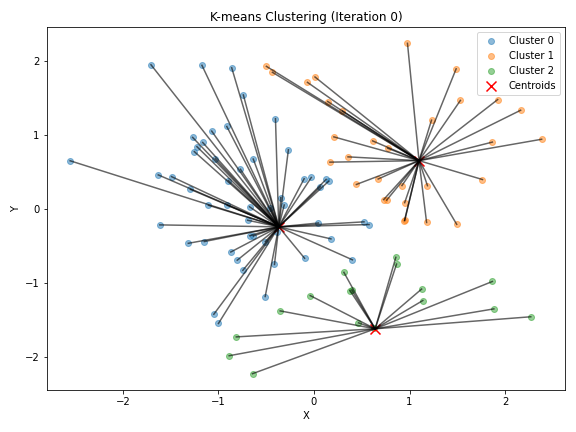

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import ipywidgets as widgets
from IPython.display import display
from IPython.display import Image

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to assign each data point to the nearest centroid
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

# Function to update centroids based on the mean of data points assigned to each cluster
def update_centroids(data, clusters, k):
    centroids = []
    for i in range(k):
        cluster_points = [data[j] for j in range(len(data)) if clusters[j] == i]
        new_centroid = np.mean(cluster_points, axis=0)
        centroids.append(new_centroid)
    return centroids

# Generate random data points
np.random.seed(0)
data = np.random.randn(100, 2)

# Number of clusters
k = 3

# Maximum number of iterations
max_iter = 10

# Initialize centroids
centroids = np.random.randn(k, 2)

# Create frames for animation
frames = []
for i in range(max_iter + 1):
    plt.figure(figsize=(8, 6))
    plt.title(f'K-means Clustering (Iteration {i})')
    plt.xlabel('X')
    plt.ylabel('Y')
    
    # Assign data points to clusters
    clusters = assign_clusters(data, centroids)
    
    # Plot data points and centroids
    for cluster_id in range(k):
        cluster_points = np.array([data[j] for j in range(len(data)) if clusters[j] == cluster_id])
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', alpha=0.5)
    
    # Convert centroids to numpy array
    centroids = np.array(centroids)
    
    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
    
    # Plot lines connecting data points to centroids with 60% transparency
    for j, point in enumerate(data):
        centroid = centroids[clusters[j]]
        plt.plot([point[0], centroid[0]], [point[1], centroid[1]], 'k-', alpha=0.6)

    
    
    plt.legend()
    plt.tight_layout()
    
    # Save frame
    filename = f'frame_{i}.png'
    plt.savefig(filename)
    plt.close()
    
    # Add frame to list
    frames.append(imageio.imread(filename))

    # Update centroids for the next iteration
    if i < max_iter:
        centroids = update_centroids(data, clusters, k)

# Combine frames into a GIF with a duration of 200 milliseconds per frame (5 frames per second)
imageio.mimsave('kmeans_clustering_animation.gif', frames, duration=200)

# Display the GIF
def display_animation(frame):
    filename = f'frame_{frame}.png'
    return Image(filename=filename)

# Create a slider widget
frame_slider = widgets.IntSlider(min=0, max=max_iter, step=1, value=0)

# Use the interact function to link the slider and the display function
widgets.interact(display_animation, frame=frame_slider)

# Show the GIF animation initially
display_animation(0)


In [79]:
# Create frames for animation
frames = {algorithm: [] for algorithm in algorithms}
for i in range(max_iter + 1):
    plt.figure(figsize=(16, 12))
    plt.suptitle(f'Agglomerative Clustering (Iteration {i})', fontsize=16)
    
    for idx, algorithm in enumerate(algorithms, start=1):
        plt.subplot(2, 2, idx)
        plt.title(f'{algorithm.capitalize()} Linkage')
        plt.xlabel('X')
        plt.ylabel('Y')
        
        # Perform clustering
        clustering = AgglomerativeClustering(n_clusters=k, linkage=algorithm)
        clusters = clustering.fit_predict(data)
        print(f'Clusters using {algorithm} linkage:', clusters)
        
        # Plot data points
        colors = plt.cm.viridis(np.linspace(0, 1, k))
        for cluster_id in range(k):
            cluster_points = data[clusters == cluster_id]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster_id], alpha=0.5)
        
        plt.tight_layout()
        
        # Save frame
        filename = f'frame_{algorithm}_{i}.png'
        plt.savefig(filename)
        plt.close()
        
        # Add frame to list
        frames[algorithm].append(imageio.imread(filename))

# Combine frames into GIFs with a duration of 200 milliseconds per frame (5 frames per second)
for algorithm in algorithms:
    imageio.mimsave(f'agglomerative_clustering_animation_{algorithm}.gif', frames[algorithm], duration=200)


Clusters using single linkage: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0]
Clusters using complete linkage: [2 3 0 1 3 1 1 1 0 0 1 1 1 0 1 1 3 1 0 3 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 2 2
 1 2 0 1 1 1 2 0 1 3 0 1 1 3 3 1 2 0 1 3 0 2 0 0 1 3 1 1 0 2 3 2 4 2 3 3 1
 1 1 1 3 4 4 0 1 0 2 1 3 0 1 3 1 4 1 0 2 0 2 0 1 2 0 2 2 1 1 2 1 4 0 1 2 1
 0 1 0 1 1 3 1 1 1 1 1 1 3 0 0 1 0 1 0 0 1 1 0 1 2 0 1 0 0 1 1 1 1 0 1 2 1
 0 1]
Clusters using average linkage: [1 2 3 3 2 4 4 1 3 2 3 4 4 3 4 4 2 3 3 2 3 3 3 3 3 2 4 3 4 1 4 1 4 1 3 1 1
 4 1 3 4 3 1 1 3 1 2 3 4 4 2 2 0 1 3 4 4 3 1 3 3 4 2 3 4 3 1 4 1 0 1 2 2 4
 1 1 4 2 4 4 3 1 2 1 4 2 3 4 2 4 0 1 3 1 3 1 3 4 1 3 1 1 1 0 1 4 0 3 4 1 4
 3 3 3 1 3 4 4 4 1 4 0 4 2 3 3 1 3 1 3 3 1 1 3 4 1 3 4 3 3 3 1 1 4 

Clusters using single linkage: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0]


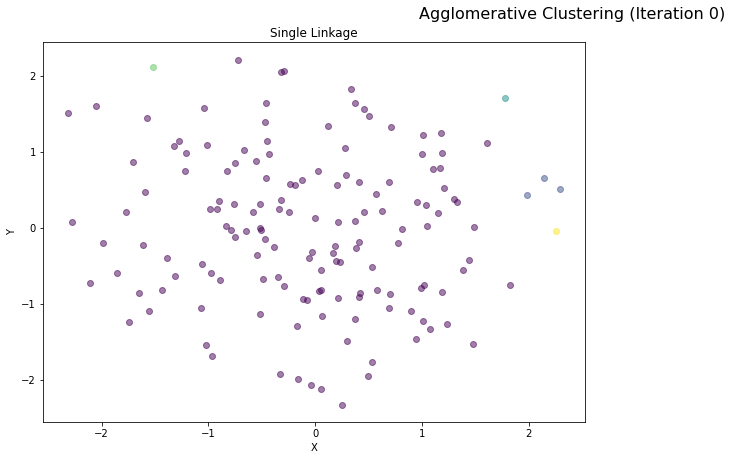

Clusters using complete linkage: [2 3 0 1 3 1 1 1 0 0 1 1 1 0 1 1 3 1 0 3 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 2 2
 1 2 0 1 1 1 2 0 1 3 0 1 1 3 3 1 2 0 1 3 0 2 0 0 1 3 1 1 0 2 3 2 4 2 3 3 1
 1 1 1 3 4 4 0 1 0 2 1 3 0 1 3 1 4 1 0 2 0 2 0 1 2 0 2 2 1 1 2 1 4 0 1 2 1
 0 1 0 1 1 3 1 1 1 1 1 1 3 0 0 1 0 1 0 0 1 1 0 1 2 0 1 0 0 1 1 1 1 0 1 2 1
 0 1]


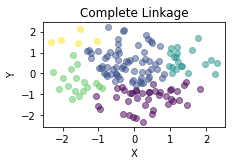

Clusters using average linkage: [1 2 3 3 2 4 4 1 3 2 3 4 4 3 4 4 2 3 3 2 3 3 3 3 3 2 4 3 4 1 4 1 4 1 3 1 1
 4 1 3 4 3 1 1 3 1 2 3 4 4 2 2 0 1 3 4 4 3 1 3 3 4 2 3 4 3 1 4 1 0 1 2 2 4
 1 1 4 2 4 4 3 1 2 1 4 2 3 4 2 4 0 1 3 1 3 1 3 4 1 3 1 1 1 0 1 4 0 3 4 1 4
 3 3 3 1 3 4 4 4 1 4 0 4 2 3 3 1 3 1 3 3 1 1 3 4 1 3 4 3 3 3 1 1 4 3 4 1 4
 3 4]


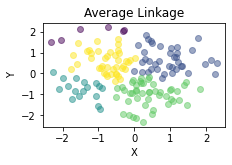

Clusters using ward linkage: [2 4 1 3 4 3 0 3 1 4 3 3 3 1 0 0 4 3 1 4 3 1 1 1 1 4 0 1 3 3 0 3 3 0 1 2 2
 3 2 3 3 3 0 2 1 0 4 1 0 3 4 4 0 2 1 0 0 1 2 1 1 0 4 3 3 1 2 0 2 0 2 4 4 3
 3 3 0 4 0 0 1 3 4 2 3 4 1 3 4 3 0 0 1 2 1 2 1 3 2 1 2 2 3 0 2 0 0 1 3 2 3
 1 3 1 3 3 0 0 3 0 0 0 3 4 1 1 0 1 0 1 1 3 3 1 0 2 1 0 1 1 3 3 3 3 1 3 2 3
 1 3]


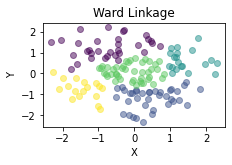

Clusters using single linkage: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0]


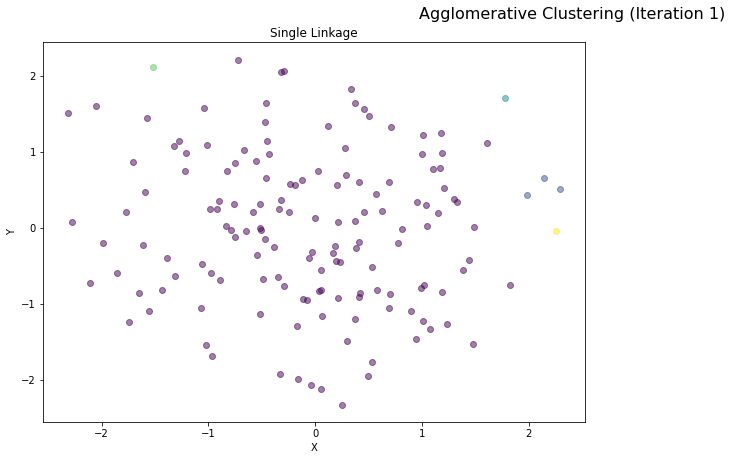

Clusters using complete linkage: [2 3 0 1 3 1 1 1 0 0 1 1 1 0 1 1 3 1 0 3 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 2 2
 1 2 0 1 1 1 2 0 1 3 0 1 1 3 3 1 2 0 1 3 0 2 0 0 1 3 1 1 0 2 3 2 4 2 3 3 1
 1 1 1 3 4 4 0 1 0 2 1 3 0 1 3 1 4 1 0 2 0 2 0 1 2 0 2 2 1 1 2 1 4 0 1 2 1
 0 1 0 1 1 3 1 1 1 1 1 1 3 0 0 1 0 1 0 0 1 1 0 1 2 0 1 0 0 1 1 1 1 0 1 2 1
 0 1]


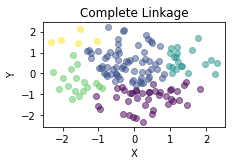

Clusters using average linkage: [1 2 3 3 2 4 4 1 3 2 3 4 4 3 4 4 2 3 3 2 3 3 3 3 3 2 4 3 4 1 4 1 4 1 3 1 1
 4 1 3 4 3 1 1 3 1 2 3 4 4 2 2 0 1 3 4 4 3 1 3 3 4 2 3 4 3 1 4 1 0 1 2 2 4
 1 1 4 2 4 4 3 1 2 1 4 2 3 4 2 4 0 1 3 1 3 1 3 4 1 3 1 1 1 0 1 4 0 3 4 1 4
 3 3 3 1 3 4 4 4 1 4 0 4 2 3 3 1 3 1 3 3 1 1 3 4 1 3 4 3 3 3 1 1 4 3 4 1 4
 3 4]


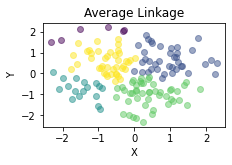

Clusters using ward linkage: [2 4 1 3 4 3 0 3 1 4 3 3 3 1 0 0 4 3 1 4 3 1 1 1 1 4 0 1 3 3 0 3 3 0 1 2 2
 3 2 3 3 3 0 2 1 0 4 1 0 3 4 4 0 2 1 0 0 1 2 1 1 0 4 3 3 1 2 0 2 0 2 4 4 3
 3 3 0 4 0 0 1 3 4 2 3 4 1 3 4 3 0 0 1 2 1 2 1 3 2 1 2 2 3 0 2 0 0 1 3 2 3
 1 3 1 3 3 0 0 3 0 0 0 3 4 1 1 0 1 0 1 1 3 3 1 0 2 1 0 1 1 3 3 3 3 1 3 2 3
 1 3]


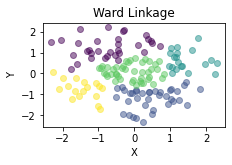

Clusters using single linkage: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0]


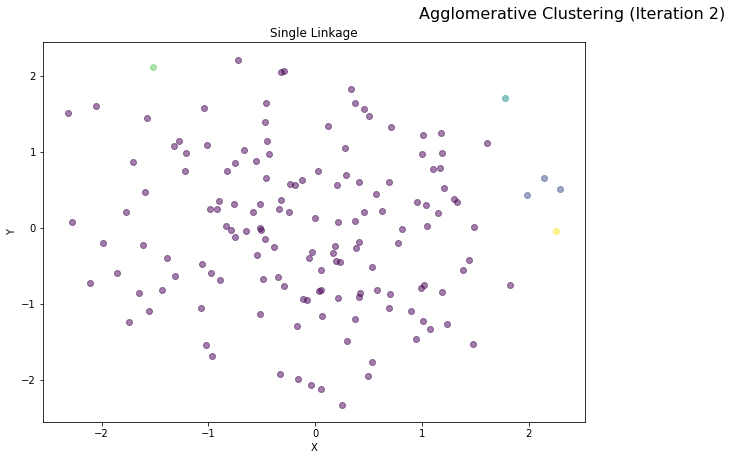

Clusters using complete linkage: [2 3 0 1 3 1 1 1 0 0 1 1 1 0 1 1 3 1 0 3 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 2 2
 1 2 0 1 1 1 2 0 1 3 0 1 1 3 3 1 2 0 1 3 0 2 0 0 1 3 1 1 0 2 3 2 4 2 3 3 1
 1 1 1 3 4 4 0 1 0 2 1 3 0 1 3 1 4 1 0 2 0 2 0 1 2 0 2 2 1 1 2 1 4 0 1 2 1
 0 1 0 1 1 3 1 1 1 1 1 1 3 0 0 1 0 1 0 0 1 1 0 1 2 0 1 0 0 1 1 1 1 0 1 2 1
 0 1]


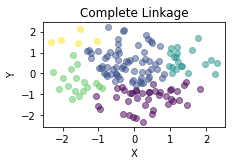

Clusters using average linkage: [1 2 3 3 2 4 4 1 3 2 3 4 4 3 4 4 2 3 3 2 3 3 3 3 3 2 4 3 4 1 4 1 4 1 3 1 1
 4 1 3 4 3 1 1 3 1 2 3 4 4 2 2 0 1 3 4 4 3 1 3 3 4 2 3 4 3 1 4 1 0 1 2 2 4
 1 1 4 2 4 4 3 1 2 1 4 2 3 4 2 4 0 1 3 1 3 1 3 4 1 3 1 1 1 0 1 4 0 3 4 1 4
 3 3 3 1 3 4 4 4 1 4 0 4 2 3 3 1 3 1 3 3 1 1 3 4 1 3 4 3 3 3 1 1 4 3 4 1 4
 3 4]


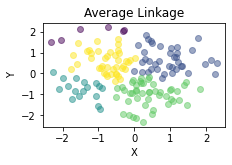

Clusters using ward linkage: [2 4 1 3 4 3 0 3 1 4 3 3 3 1 0 0 4 3 1 4 3 1 1 1 1 4 0 1 3 3 0 3 3 0 1 2 2
 3 2 3 3 3 0 2 1 0 4 1 0 3 4 4 0 2 1 0 0 1 2 1 1 0 4 3 3 1 2 0 2 0 2 4 4 3
 3 3 0 4 0 0 1 3 4 2 3 4 1 3 4 3 0 0 1 2 1 2 1 3 2 1 2 2 3 0 2 0 0 1 3 2 3
 1 3 1 3 3 0 0 3 0 0 0 3 4 1 1 0 1 0 1 1 3 3 1 0 2 1 0 1 1 3 3 3 3 1 3 2 3
 1 3]


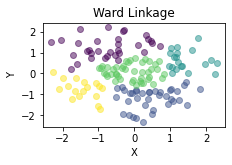

Clusters using single linkage: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0]


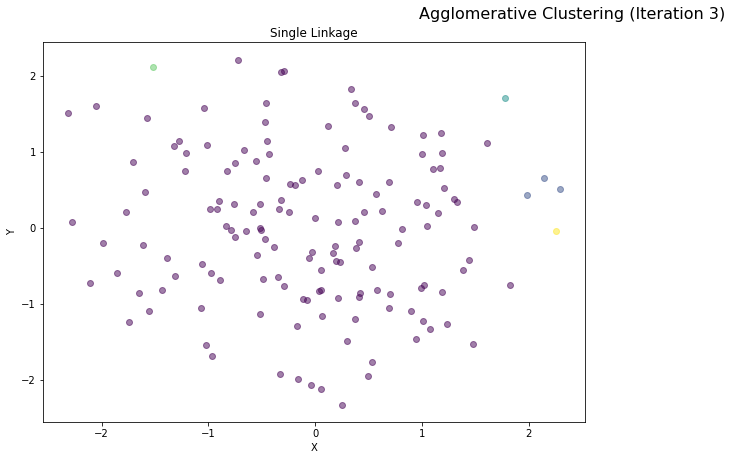

Clusters using complete linkage: [2 3 0 1 3 1 1 1 0 0 1 1 1 0 1 1 3 1 0 3 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 2 2
 1 2 0 1 1 1 2 0 1 3 0 1 1 3 3 1 2 0 1 3 0 2 0 0 1 3 1 1 0 2 3 2 4 2 3 3 1
 1 1 1 3 4 4 0 1 0 2 1 3 0 1 3 1 4 1 0 2 0 2 0 1 2 0 2 2 1 1 2 1 4 0 1 2 1
 0 1 0 1 1 3 1 1 1 1 1 1 3 0 0 1 0 1 0 0 1 1 0 1 2 0 1 0 0 1 1 1 1 0 1 2 1
 0 1]


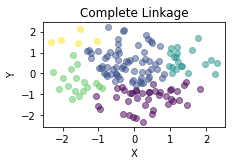

Clusters using average linkage: [1 2 3 3 2 4 4 1 3 2 3 4 4 3 4 4 2 3 3 2 3 3 3 3 3 2 4 3 4 1 4 1 4 1 3 1 1
 4 1 3 4 3 1 1 3 1 2 3 4 4 2 2 0 1 3 4 4 3 1 3 3 4 2 3 4 3 1 4 1 0 1 2 2 4
 1 1 4 2 4 4 3 1 2 1 4 2 3 4 2 4 0 1 3 1 3 1 3 4 1 3 1 1 1 0 1 4 0 3 4 1 4
 3 3 3 1 3 4 4 4 1 4 0 4 2 3 3 1 3 1 3 3 1 1 3 4 1 3 4 3 3 3 1 1 4 3 4 1 4
 3 4]


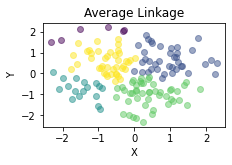

Clusters using ward linkage: [2 4 1 3 4 3 0 3 1 4 3 3 3 1 0 0 4 3 1 4 3 1 1 1 1 4 0 1 3 3 0 3 3 0 1 2 2
 3 2 3 3 3 0 2 1 0 4 1 0 3 4 4 0 2 1 0 0 1 2 1 1 0 4 3 3 1 2 0 2 0 2 4 4 3
 3 3 0 4 0 0 1 3 4 2 3 4 1 3 4 3 0 0 1 2 1 2 1 3 2 1 2 2 3 0 2 0 0 1 3 2 3
 1 3 1 3 3 0 0 3 0 0 0 3 4 1 1 0 1 0 1 1 3 3 1 0 2 1 0 1 1 3 3 3 3 1 3 2 3
 1 3]


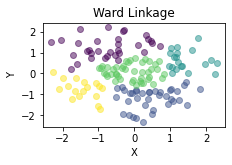

Clusters using single linkage: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0]


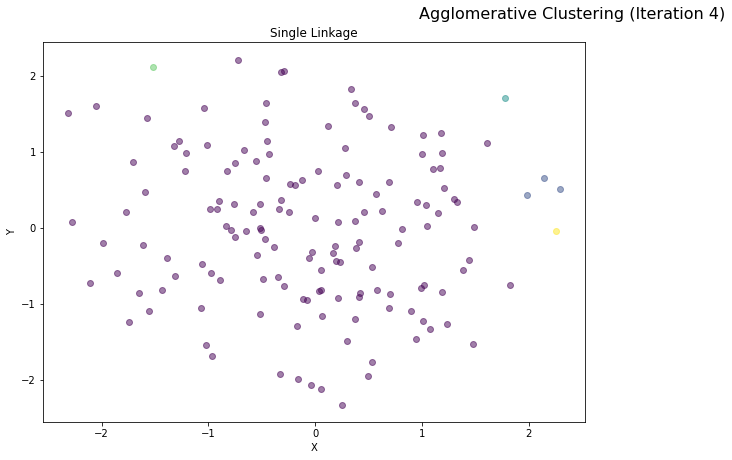

Clusters using complete linkage: [2 3 0 1 3 1 1 1 0 0 1 1 1 0 1 1 3 1 0 3 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 2 2
 1 2 0 1 1 1 2 0 1 3 0 1 1 3 3 1 2 0 1 3 0 2 0 0 1 3 1 1 0 2 3 2 4 2 3 3 1
 1 1 1 3 4 4 0 1 0 2 1 3 0 1 3 1 4 1 0 2 0 2 0 1 2 0 2 2 1 1 2 1 4 0 1 2 1
 0 1 0 1 1 3 1 1 1 1 1 1 3 0 0 1 0 1 0 0 1 1 0 1 2 0 1 0 0 1 1 1 1 0 1 2 1
 0 1]


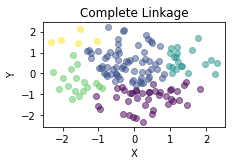

Clusters using average linkage: [1 2 3 3 2 4 4 1 3 2 3 4 4 3 4 4 2 3 3 2 3 3 3 3 3 2 4 3 4 1 4 1 4 1 3 1 1
 4 1 3 4 3 1 1 3 1 2 3 4 4 2 2 0 1 3 4 4 3 1 3 3 4 2 3 4 3 1 4 1 0 1 2 2 4
 1 1 4 2 4 4 3 1 2 1 4 2 3 4 2 4 0 1 3 1 3 1 3 4 1 3 1 1 1 0 1 4 0 3 4 1 4
 3 3 3 1 3 4 4 4 1 4 0 4 2 3 3 1 3 1 3 3 1 1 3 4 1 3 4 3 3 3 1 1 4 3 4 1 4
 3 4]


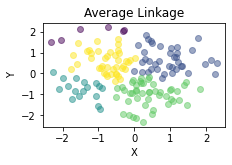

Clusters using ward linkage: [2 4 1 3 4 3 0 3 1 4 3 3 3 1 0 0 4 3 1 4 3 1 1 1 1 4 0 1 3 3 0 3 3 0 1 2 2
 3 2 3 3 3 0 2 1 0 4 1 0 3 4 4 0 2 1 0 0 1 2 1 1 0 4 3 3 1 2 0 2 0 2 4 4 3
 3 3 0 4 0 0 1 3 4 2 3 4 1 3 4 3 0 0 1 2 1 2 1 3 2 1 2 2 3 0 2 0 0 1 3 2 3
 1 3 1 3 3 0 0 3 0 0 0 3 4 1 1 0 1 0 1 1 3 3 1 0 2 1 0 1 1 3 3 3 3 1 3 2 3
 1 3]


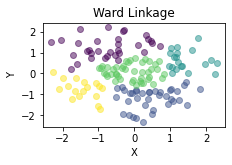

Clusters using single linkage: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0]


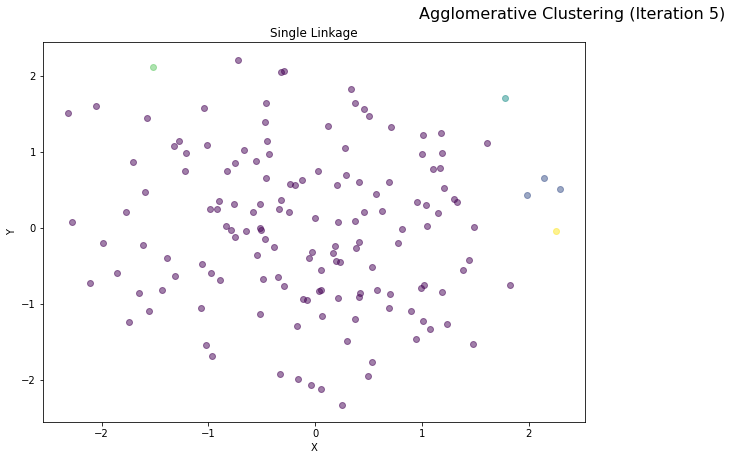

Clusters using complete linkage: [2 3 0 1 3 1 1 1 0 0 1 1 1 0 1 1 3 1 0 3 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 2 2
 1 2 0 1 1 1 2 0 1 3 0 1 1 3 3 1 2 0 1 3 0 2 0 0 1 3 1 1 0 2 3 2 4 2 3 3 1
 1 1 1 3 4 4 0 1 0 2 1 3 0 1 3 1 4 1 0 2 0 2 0 1 2 0 2 2 1 1 2 1 4 0 1 2 1
 0 1 0 1 1 3 1 1 1 1 1 1 3 0 0 1 0 1 0 0 1 1 0 1 2 0 1 0 0 1 1 1 1 0 1 2 1
 0 1]


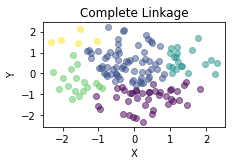

Clusters using average linkage: [1 2 3 3 2 4 4 1 3 2 3 4 4 3 4 4 2 3 3 2 3 3 3 3 3 2 4 3 4 1 4 1 4 1 3 1 1
 4 1 3 4 3 1 1 3 1 2 3 4 4 2 2 0 1 3 4 4 3 1 3 3 4 2 3 4 3 1 4 1 0 1 2 2 4
 1 1 4 2 4 4 3 1 2 1 4 2 3 4 2 4 0 1 3 1 3 1 3 4 1 3 1 1 1 0 1 4 0 3 4 1 4
 3 3 3 1 3 4 4 4 1 4 0 4 2 3 3 1 3 1 3 3 1 1 3 4 1 3 4 3 3 3 1 1 4 3 4 1 4
 3 4]


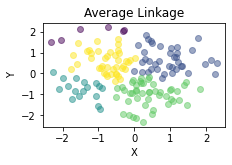

Clusters using ward linkage: [2 4 1 3 4 3 0 3 1 4 3 3 3 1 0 0 4 3 1 4 3 1 1 1 1 4 0 1 3 3 0 3 3 0 1 2 2
 3 2 3 3 3 0 2 1 0 4 1 0 3 4 4 0 2 1 0 0 1 2 1 1 0 4 3 3 1 2 0 2 0 2 4 4 3
 3 3 0 4 0 0 1 3 4 2 3 4 1 3 4 3 0 0 1 2 1 2 1 3 2 1 2 2 3 0 2 0 0 1 3 2 3
 1 3 1 3 3 0 0 3 0 0 0 3 4 1 1 0 1 0 1 1 3 3 1 0 2 1 0 1 1 3 3 3 3 1 3 2 3
 1 3]


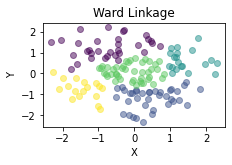

Clusters using single linkage: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0]


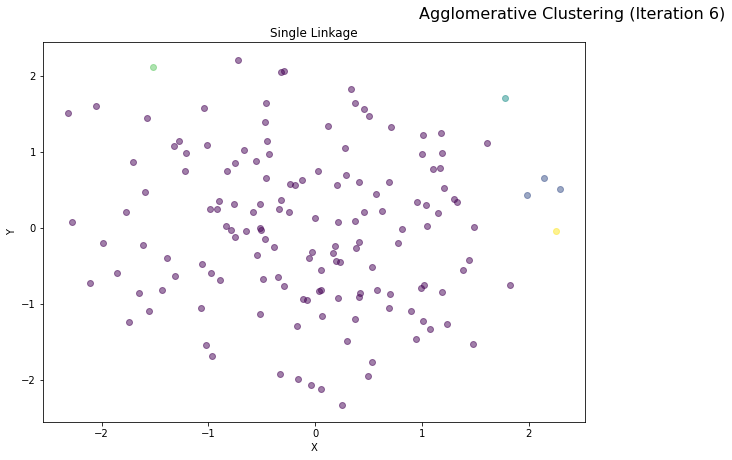

Clusters using complete linkage: [2 3 0 1 3 1 1 1 0 0 1 1 1 0 1 1 3 1 0 3 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 2 2
 1 2 0 1 1 1 2 0 1 3 0 1 1 3 3 1 2 0 1 3 0 2 0 0 1 3 1 1 0 2 3 2 4 2 3 3 1
 1 1 1 3 4 4 0 1 0 2 1 3 0 1 3 1 4 1 0 2 0 2 0 1 2 0 2 2 1 1 2 1 4 0 1 2 1
 0 1 0 1 1 3 1 1 1 1 1 1 3 0 0 1 0 1 0 0 1 1 0 1 2 0 1 0 0 1 1 1 1 0 1 2 1
 0 1]


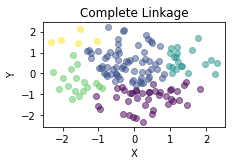

Clusters using average linkage: [1 2 3 3 2 4 4 1 3 2 3 4 4 3 4 4 2 3 3 2 3 3 3 3 3 2 4 3 4 1 4 1 4 1 3 1 1
 4 1 3 4 3 1 1 3 1 2 3 4 4 2 2 0 1 3 4 4 3 1 3 3 4 2 3 4 3 1 4 1 0 1 2 2 4
 1 1 4 2 4 4 3 1 2 1 4 2 3 4 2 4 0 1 3 1 3 1 3 4 1 3 1 1 1 0 1 4 0 3 4 1 4
 3 3 3 1 3 4 4 4 1 4 0 4 2 3 3 1 3 1 3 3 1 1 3 4 1 3 4 3 3 3 1 1 4 3 4 1 4
 3 4]


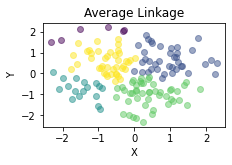

Clusters using ward linkage: [2 4 1 3 4 3 0 3 1 4 3 3 3 1 0 0 4 3 1 4 3 1 1 1 1 4 0 1 3 3 0 3 3 0 1 2 2
 3 2 3 3 3 0 2 1 0 4 1 0 3 4 4 0 2 1 0 0 1 2 1 1 0 4 3 3 1 2 0 2 0 2 4 4 3
 3 3 0 4 0 0 1 3 4 2 3 4 1 3 4 3 0 0 1 2 1 2 1 3 2 1 2 2 3 0 2 0 0 1 3 2 3
 1 3 1 3 3 0 0 3 0 0 0 3 4 1 1 0 1 0 1 1 3 3 1 0 2 1 0 1 1 3 3 3 3 1 3 2 3
 1 3]


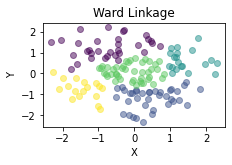

Clusters using single linkage: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0]


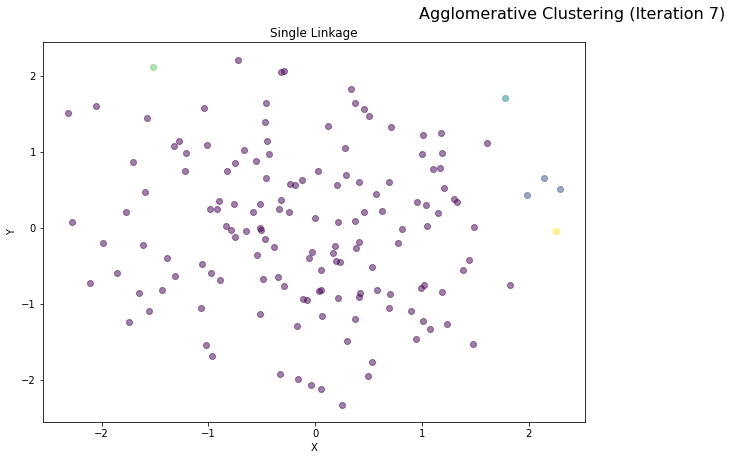

Clusters using complete linkage: [2 3 0 1 3 1 1 1 0 0 1 1 1 0 1 1 3 1 0 3 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 2 2
 1 2 0 1 1 1 2 0 1 3 0 1 1 3 3 1 2 0 1 3 0 2 0 0 1 3 1 1 0 2 3 2 4 2 3 3 1
 1 1 1 3 4 4 0 1 0 2 1 3 0 1 3 1 4 1 0 2 0 2 0 1 2 0 2 2 1 1 2 1 4 0 1 2 1
 0 1 0 1 1 3 1 1 1 1 1 1 3 0 0 1 0 1 0 0 1 1 0 1 2 0 1 0 0 1 1 1 1 0 1 2 1
 0 1]


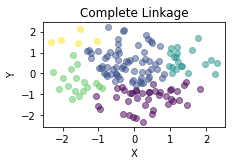

Clusters using average linkage: [1 2 3 3 2 4 4 1 3 2 3 4 4 3 4 4 2 3 3 2 3 3 3 3 3 2 4 3 4 1 4 1 4 1 3 1 1
 4 1 3 4 3 1 1 3 1 2 3 4 4 2 2 0 1 3 4 4 3 1 3 3 4 2 3 4 3 1 4 1 0 1 2 2 4
 1 1 4 2 4 4 3 1 2 1 4 2 3 4 2 4 0 1 3 1 3 1 3 4 1 3 1 1 1 0 1 4 0 3 4 1 4
 3 3 3 1 3 4 4 4 1 4 0 4 2 3 3 1 3 1 3 3 1 1 3 4 1 3 4 3 3 3 1 1 4 3 4 1 4
 3 4]


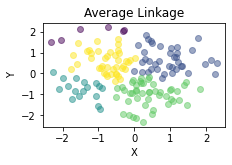

Clusters using ward linkage: [2 4 1 3 4 3 0 3 1 4 3 3 3 1 0 0 4 3 1 4 3 1 1 1 1 4 0 1 3 3 0 3 3 0 1 2 2
 3 2 3 3 3 0 2 1 0 4 1 0 3 4 4 0 2 1 0 0 1 2 1 1 0 4 3 3 1 2 0 2 0 2 4 4 3
 3 3 0 4 0 0 1 3 4 2 3 4 1 3 4 3 0 0 1 2 1 2 1 3 2 1 2 2 3 0 2 0 0 1 3 2 3
 1 3 1 3 3 0 0 3 0 0 0 3 4 1 1 0 1 0 1 1 3 3 1 0 2 1 0 1 1 3 3 3 3 1 3 2 3
 1 3]


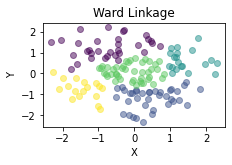

Clusters using single linkage: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0]


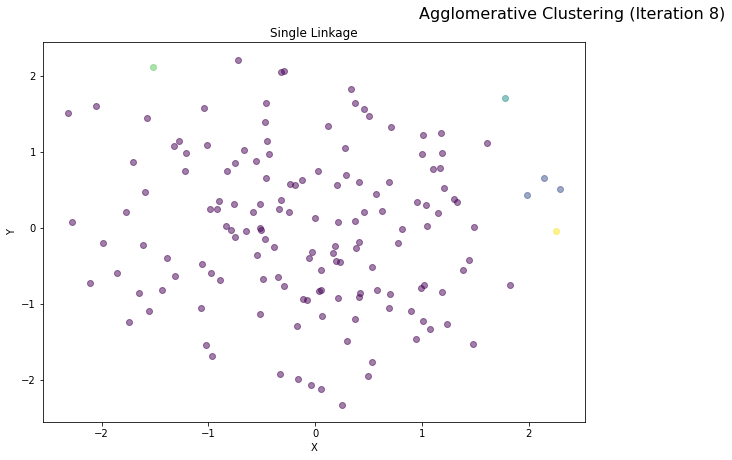

Clusters using complete linkage: [2 3 0 1 3 1 1 1 0 0 1 1 1 0 1 1 3 1 0 3 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 2 2
 1 2 0 1 1 1 2 0 1 3 0 1 1 3 3 1 2 0 1 3 0 2 0 0 1 3 1 1 0 2 3 2 4 2 3 3 1
 1 1 1 3 4 4 0 1 0 2 1 3 0 1 3 1 4 1 0 2 0 2 0 1 2 0 2 2 1 1 2 1 4 0 1 2 1
 0 1 0 1 1 3 1 1 1 1 1 1 3 0 0 1 0 1 0 0 1 1 0 1 2 0 1 0 0 1 1 1 1 0 1 2 1
 0 1]


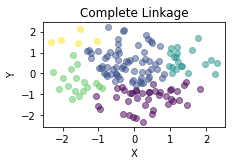

Clusters using average linkage: [1 2 3 3 2 4 4 1 3 2 3 4 4 3 4 4 2 3 3 2 3 3 3 3 3 2 4 3 4 1 4 1 4 1 3 1 1
 4 1 3 4 3 1 1 3 1 2 3 4 4 2 2 0 1 3 4 4 3 1 3 3 4 2 3 4 3 1 4 1 0 1 2 2 4
 1 1 4 2 4 4 3 1 2 1 4 2 3 4 2 4 0 1 3 1 3 1 3 4 1 3 1 1 1 0 1 4 0 3 4 1 4
 3 3 3 1 3 4 4 4 1 4 0 4 2 3 3 1 3 1 3 3 1 1 3 4 1 3 4 3 3 3 1 1 4 3 4 1 4
 3 4]


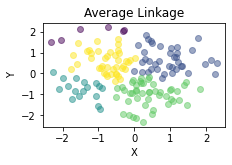

Clusters using ward linkage: [2 4 1 3 4 3 0 3 1 4 3 3 3 1 0 0 4 3 1 4 3 1 1 1 1 4 0 1 3 3 0 3 3 0 1 2 2
 3 2 3 3 3 0 2 1 0 4 1 0 3 4 4 0 2 1 0 0 1 2 1 1 0 4 3 3 1 2 0 2 0 2 4 4 3
 3 3 0 4 0 0 1 3 4 2 3 4 1 3 4 3 0 0 1 2 1 2 1 3 2 1 2 2 3 0 2 0 0 1 3 2 3
 1 3 1 3 3 0 0 3 0 0 0 3 4 1 1 0 1 0 1 1 3 3 1 0 2 1 0 1 1 3 3 3 3 1 3 2 3
 1 3]


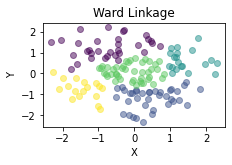

Clusters using single linkage: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0]


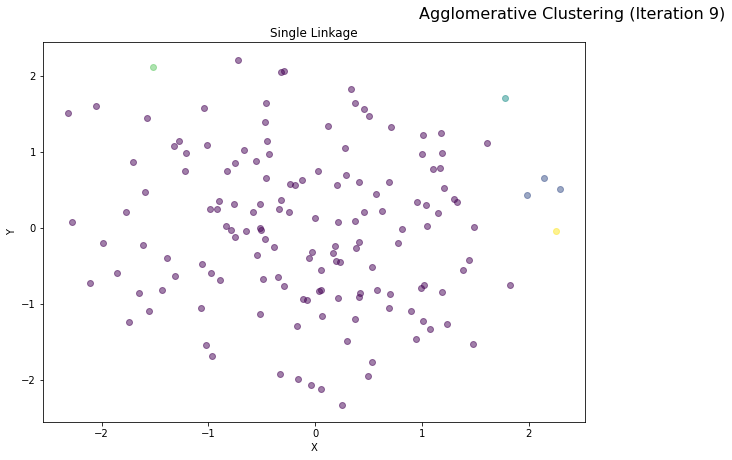

Clusters using complete linkage: [2 3 0 1 3 1 1 1 0 0 1 1 1 0 1 1 3 1 0 3 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 2 2
 1 2 0 1 1 1 2 0 1 3 0 1 1 3 3 1 2 0 1 3 0 2 0 0 1 3 1 1 0 2 3 2 4 2 3 3 1
 1 1 1 3 4 4 0 1 0 2 1 3 0 1 3 1 4 1 0 2 0 2 0 1 2 0 2 2 1 1 2 1 4 0 1 2 1
 0 1 0 1 1 3 1 1 1 1 1 1 3 0 0 1 0 1 0 0 1 1 0 1 2 0 1 0 0 1 1 1 1 0 1 2 1
 0 1]


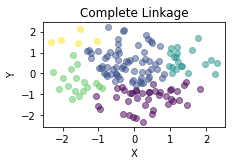

Clusters using average linkage: [1 2 3 3 2 4 4 1 3 2 3 4 4 3 4 4 2 3 3 2 3 3 3 3 3 2 4 3 4 1 4 1 4 1 3 1 1
 4 1 3 4 3 1 1 3 1 2 3 4 4 2 2 0 1 3 4 4 3 1 3 3 4 2 3 4 3 1 4 1 0 1 2 2 4
 1 1 4 2 4 4 3 1 2 1 4 2 3 4 2 4 0 1 3 1 3 1 3 4 1 3 1 1 1 0 1 4 0 3 4 1 4
 3 3 3 1 3 4 4 4 1 4 0 4 2 3 3 1 3 1 3 3 1 1 3 4 1 3 4 3 3 3 1 1 4 3 4 1 4
 3 4]


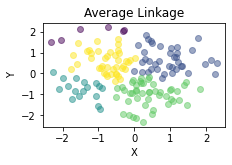

Clusters using ward linkage: [2 4 1 3 4 3 0 3 1 4 3 3 3 1 0 0 4 3 1 4 3 1 1 1 1 4 0 1 3 3 0 3 3 0 1 2 2
 3 2 3 3 3 0 2 1 0 4 1 0 3 4 4 0 2 1 0 0 1 2 1 1 0 4 3 3 1 2 0 2 0 2 4 4 3
 3 3 0 4 0 0 1 3 4 2 3 4 1 3 4 3 0 0 1 2 1 2 1 3 2 1 2 2 3 0 2 0 0 1 3 2 3
 1 3 1 3 3 0 0 3 0 0 0 3 4 1 1 0 1 0 1 1 3 3 1 0 2 1 0 1 1 3 3 3 3 1 3 2 3
 1 3]


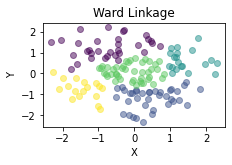

Clusters using single linkage: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0]


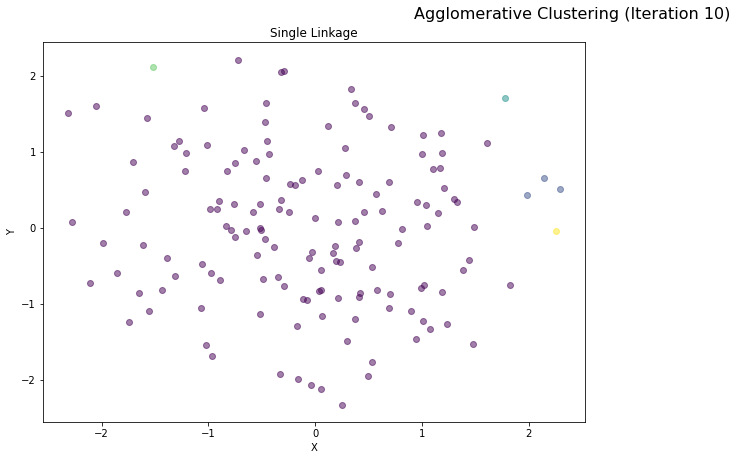

Clusters using complete linkage: [2 3 0 1 3 1 1 1 0 0 1 1 1 0 1 1 3 1 0 3 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 2 2
 1 2 0 1 1 1 2 0 1 3 0 1 1 3 3 1 2 0 1 3 0 2 0 0 1 3 1 1 0 2 3 2 4 2 3 3 1
 1 1 1 3 4 4 0 1 0 2 1 3 0 1 3 1 4 1 0 2 0 2 0 1 2 0 2 2 1 1 2 1 4 0 1 2 1
 0 1 0 1 1 3 1 1 1 1 1 1 3 0 0 1 0 1 0 0 1 1 0 1 2 0 1 0 0 1 1 1 1 0 1 2 1
 0 1]


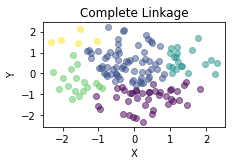

Clusters using average linkage: [1 2 3 3 2 4 4 1 3 2 3 4 4 3 4 4 2 3 3 2 3 3 3 3 3 2 4 3 4 1 4 1 4 1 3 1 1
 4 1 3 4 3 1 1 3 1 2 3 4 4 2 2 0 1 3 4 4 3 1 3 3 4 2 3 4 3 1 4 1 0 1 2 2 4
 1 1 4 2 4 4 3 1 2 1 4 2 3 4 2 4 0 1 3 1 3 1 3 4 1 3 1 1 1 0 1 4 0 3 4 1 4
 3 3 3 1 3 4 4 4 1 4 0 4 2 3 3 1 3 1 3 3 1 1 3 4 1 3 4 3 3 3 1 1 4 3 4 1 4
 3 4]


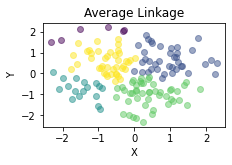

Clusters using ward linkage: [2 4 1 3 4 3 0 3 1 4 3 3 3 1 0 0 4 3 1 4 3 1 1 1 1 4 0 1 3 3 0 3 3 0 1 2 2
 3 2 3 3 3 0 2 1 0 4 1 0 3 4 4 0 2 1 0 0 1 2 1 1 0 4 3 3 1 2 0 2 0 2 4 4 3
 3 3 0 4 0 0 1 3 4 2 3 4 1 3 4 3 0 0 1 2 1 2 1 3 2 1 2 2 3 0 2 0 0 1 3 2 3
 1 3 1 3 3 0 0 3 0 0 0 3 4 1 1 0 1 0 1 1 3 3 1 0 2 1 0 1 1 3 3 3 3 1 3 2 3
 1 3]


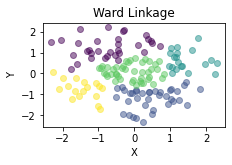

In [80]:
# Create frames for animation
frames = {algorithm: [] for algorithm in algorithms}
for i in range(max_iter + 1):
    plt.figure(figsize=(16, 12))
    plt.suptitle(f'Agglomerative Clustering (Iteration {i})', fontsize=16)
    
    for idx, algorithm in enumerate(algorithms, start=1):
        plt.subplot(2, 2, idx)
        plt.title(f'{algorithm.capitalize()} Linkage')
        plt.xlabel('X')
        plt.ylabel('Y')
        
        # Perform clustering
        clustering = AgglomerativeClustering(n_clusters=k, linkage=algorithm)
        clusters = clustering.fit_predict(data)
        print(f'Clusters using {algorithm} linkage:', clusters)
        
        # Plot data points
        colors = plt.cm.viridis(np.linspace(0, 1, k))
        for cluster_id in range(k):
            cluster_points = data[clusters == cluster_id]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster_id], alpha=0.5)
        
        plt.tight_layout()
        
        # Display frame
        plt.show()
        
        # Save frame
        filename = f'frame_{algorithm}_{i}.png'
        plt.savefig(filename)
        plt.close()
        
        # Add frame to list
        frames[algorithm].append(imageio.imread(filename))


interactive(children=(IntSlider(value=0, description='iteration', max=10), Dropdown(description='Algorithm:', …

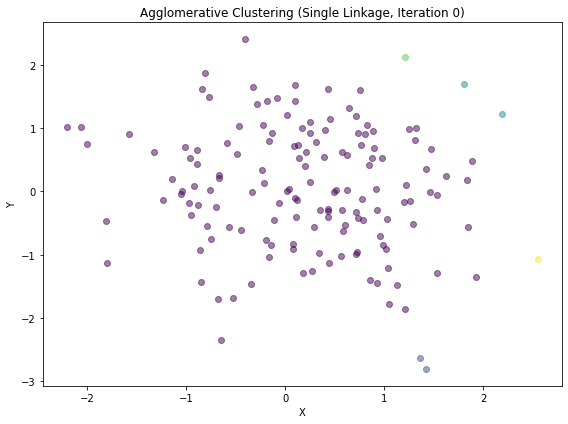

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.cluster import AgglomerativeClustering

# Generate random data points
np.random.seed()
data = np.random.randn(150, 2)

# Number of clusters
k = 5

# Maximum number of iterations
max_iter = 10

# Define clustering algorithms
algorithms = ['single', 'complete', 'average', 'ward']

# Function to perform clustering and generate plot for a specific algorithm
def generate_plot(algorithm, iteration):
    plt.figure(figsize=(8, 6))
    plt.title(f'Agglomerative Clustering ({algorithm.capitalize()} Linkage, Iteration {iteration})')
    plt.xlabel('X')
    plt.ylabel('Y')

    # Perform clustering
    clustering = AgglomerativeClustering(n_clusters=k, linkage=algorithm)
    clusters = clustering.fit_predict(data)
    
    # Plot data points
    colors = plt.cm.viridis(np.linspace(0, 1, k))
    for cluster_id in range(k):
        cluster_points = data[clusters == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster_id], alpha=0.5)

    plt.tight_layout()
    plt.show()

# Create slider widget for iteration
iteration_slider = widgets.IntSlider(min=0, max=max_iter, step=1, value=0)

# Create dropdown widget for selecting clustering algorithm
algorithm_dropdown = widgets.Dropdown(options=algorithms, description='Algorithm:')

# Define function to update plot based on slider and dropdown values
def update_plot(iteration, algorithm):
    clear_output(wait=True)
    generate_plot(algorithm, iteration)

# Display widgets and initial plot
display(widgets.interactive(update_plot, iteration=iteration_slider, algorithm=algorithm_dropdown))
generate_plot(algorithm_dropdown.value, iteration_slider.value)



interactive(children=(IntSlider(value=0, description='iteration', max=10), Dropdown(description='Algorithm:', …

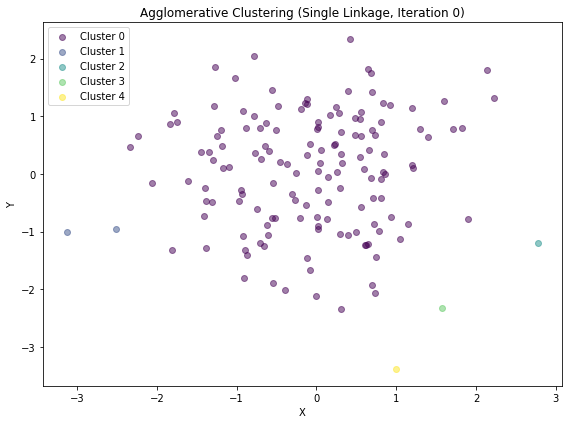

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.cluster import AgglomerativeClustering

# Generate random data points
np.random.seed()
data = np.random.randn(150, 2)

# Number of clusters
k = 5

# Maximum number of iterations
max_iter = 10

# Define clustering algorithms
algorithms = ['single', 'complete', 'average', 'ward']

# Function to perform clustering and generate plot for a specific algorithm
def generate_plot(algorithm, iteration):
    plt.figure(figsize=(8, 6))
    plt.title(f'Agglomerative Clustering ({algorithm.capitalize()} Linkage, Iteration {iteration})')
    plt.xlabel('X')
    plt.ylabel('Y')

    # Perform clustering
    clustering = AgglomerativeClustering(n_clusters=k, linkage=algorithm)
    clusters = clustering.fit_predict(data)
    
    # Plot data points
    colors = plt.cm.viridis(np.linspace(0, 1, k))
    for cluster_id in range(k):
        cluster_points = data[clusters == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster_id], alpha=0.5, label=f'Cluster {cluster_id}')

    # Add legend
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Create slider widget for iteration
iteration_slider = widgets.IntSlider(min=0, max=max_iter, step=1, value=0)

# Create dropdown widget for selecting clustering algorithm
algorithm_dropdown = widgets.Dropdown(options=algorithms, description='Algorithm:')

# Define function to update plot based on slider and dropdown values
def update_plot(iteration, algorithm):
    clear_output(wait=True)
    generate_plot(algorithm, iteration)

# Display widgets and initial plot
display(widgets.interactive(update_plot, iteration=iteration_slider, algorithm=algorithm_dropdown))
generate_plot(algorithm_dropdown.value, iteration_slider.value)


interactive(children=(IntSlider(value=0, description='iteration', max=10), Dropdown(description='Algorithm:', …

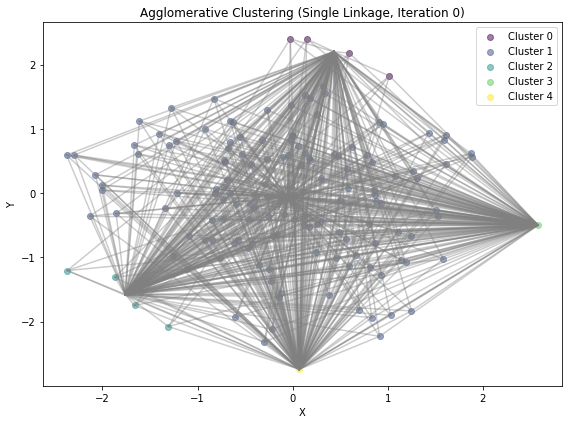

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.cluster import AgglomerativeClustering

# Generate random data points
np.random.seed()
data = np.random.randn(150, 2)

# Number of clusters
k = 5

# Maximum number of iterations
max_iter = 10

# Define clustering algorithms
algorithms = ['single', 'complete', 'average', 'ward']

# Function to perform clustering and generate plot for a specific algorithm
def generate_plot(algorithm, iteration):
    plt.figure(figsize=(8, 6))
    plt.title(f'Agglomerative Clustering ({algorithm.capitalize()} Linkage, Iteration {iteration})')
    plt.xlabel('X')
    plt.ylabel('Y')

    # Perform clustering
    clustering = AgglomerativeClustering(n_clusters=k, linkage=algorithm)
    clusters = clustering.fit_predict(data)
    
    # Plot data points
    colors = plt.cm.viridis(np.linspace(0, 1, k))
    for cluster_id in range(k):
        cluster_points = data[clusters == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster_id], alpha=0.5, label=f'Cluster {cluster_id}')

    # Highlight nodes that change cluster
    if iteration > 0:
        clustering_prev = AgglomerativeClustering(n_clusters=k, linkage=algorithm)
        clusters_prev = clustering_prev.fit_predict(data)
        changed_points = [i for i in range(len(clusters)) if clusters[i] != clusters_prev[i]]
        plt.scatter(data[changed_points, 0], data[changed_points, 1], color='red', marker='x', label='Changed Nodes')
    
    # Plot lines connecting data points to centroids with transparency
    centroids = []
    for cluster_id in range(k):
        centroid = np.mean(data[clusters == cluster_id], axis=0)
        centroids.append(centroid)
        for j, point in enumerate(data):
            if iteration == 0 or point in data[changed_points]:
                plt.plot([point[0], centroid[0]], [point[1], centroid[1]], color='gray', alpha=0.4)

    # Add legend
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Create slider widget for iteration
iteration_slider = widgets.IntSlider(min=0, max=max_iter, step=1, value=0)

# Create dropdown widget for selecting clustering algorithm
algorithm_dropdown = widgets.Dropdown(options=algorithms, description='Algorithm:')

# Define function to update plot based on slider and dropdown values
def update_plot(iteration, algorithm):
    clear_output(wait=True)
    generate_plot(algorithm, iteration)

# Display widgets and initial plot
display(widgets.interactive(update_plot, iteration=iteration_slider, algorithm=algorithm_dropdown))
generate_plot(algorithm_dropdown.value, iteration_slider.value)


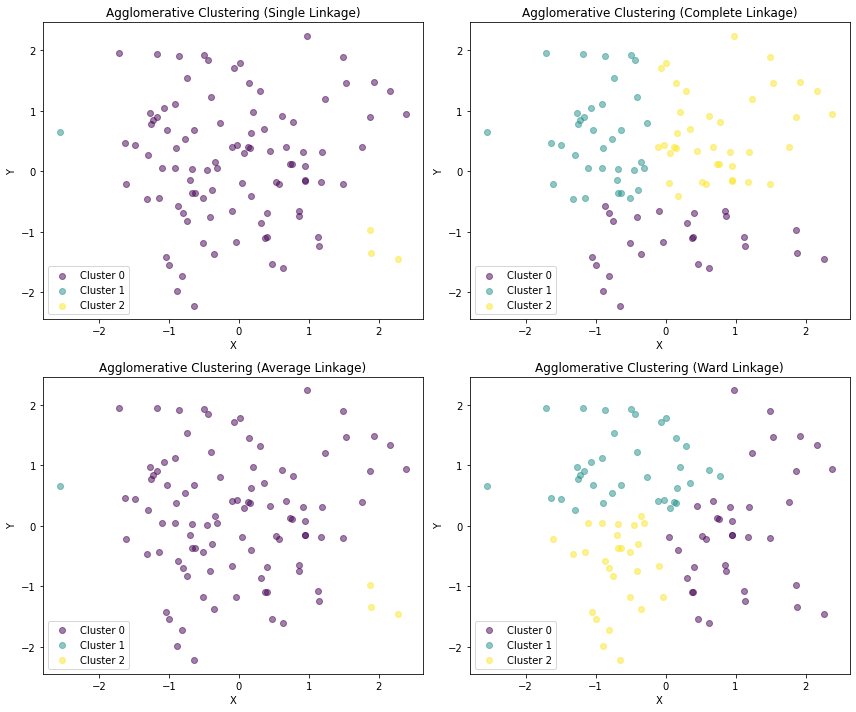

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Generate random data points
np.random.seed(0)
data = np.random.randn(100, 2)

# Number of clusters
k = 3

# Define clustering algorithms
algorithms = ['single', 'complete', 'average', 'ward']

# Create subplots for each algorithm
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()

# Plot clustering results for each algorithm
for i, algorithm in enumerate(algorithms):
    clustering = AgglomerativeClustering(n_clusters=k, linkage=algorithm)
    clusters = clustering.fit_predict(data)
    
    # Plot data points
    colors = plt.cm.viridis(np.linspace(0, 1, k))
    for cluster_id in range(k):
        cluster_points = data[clusters == cluster_id]
        axs[i].scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster_id], alpha=0.5, label=f'Cluster {cluster_id}')
    
    axs[i].set_title(f'Agglomerative Clustering ({algorithm.capitalize()} Linkage)')
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('Y')
    axs[i].legend()

plt.tight_layout()
plt.show()


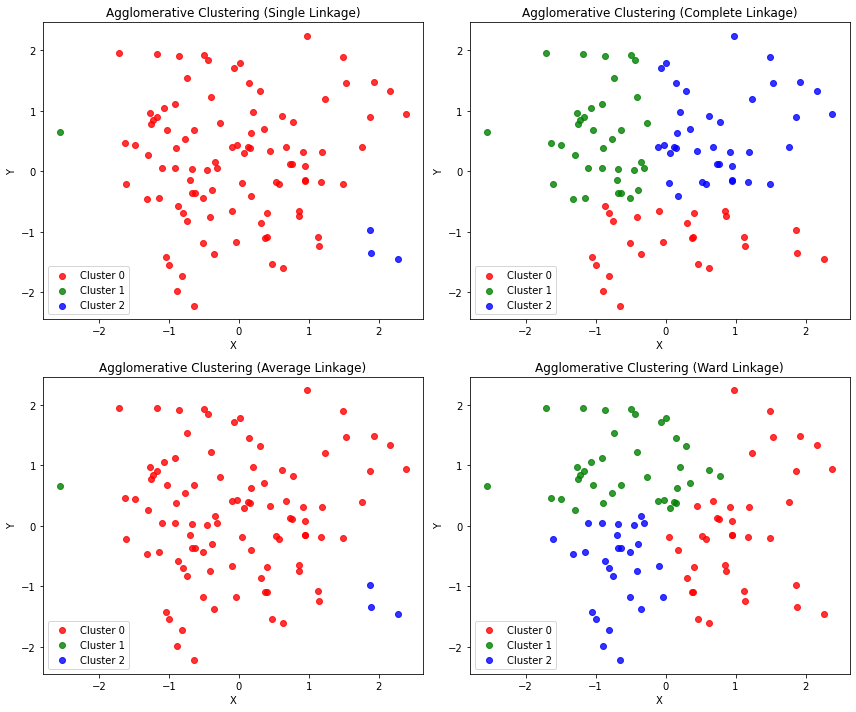

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Generate random data points
np.random.seed(0)
data = np.random.randn(100, 2)

# Number of clusters
k = 3

# Define clustering algorithms
algorithms = ['single', 'complete', 'average', 'ward']

# Define colors for clusters
colors = ['r', 'g', 'b']

# Create subplots for each algorithm
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()

# Plot clustering results for each algorithm
for i, algorithm in enumerate(algorithms):
    clustering = AgglomerativeClustering(n_clusters=k, linkage=algorithm)
    clusters = clustering.fit_predict(data)
    
    # Plot data points
    for cluster_id in range(k):
        cluster_points = data[clusters == cluster_id]
        axs[i].scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster_id], alpha=0.8, label=f'Cluster {cluster_id}')
    
    axs[i].set_title(f'Agglomerative Clustering ({algorithm.capitalize()} Linkage)')
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('Y')
    axs[i].legend()

plt.tight_layout()
plt.show()


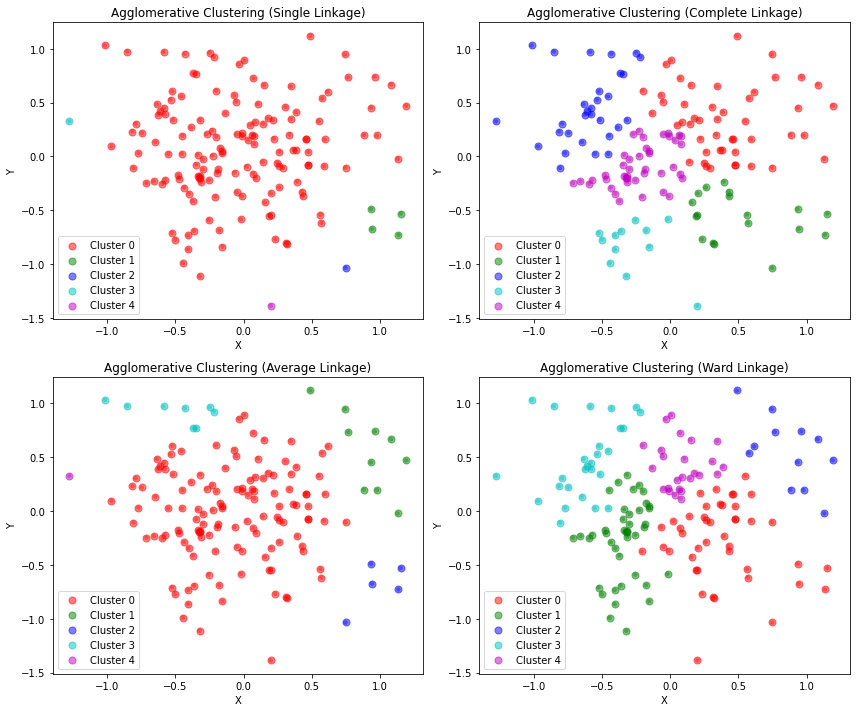

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap

# Generate sparse random data points
np.random.seed(0)
data = np.random.randn(150, 2) * 0.5  # Adjusting the scale to make it sparse

# Number of clusters
k = 5

# Define clustering algorithms
algorithms = ['single', 'complete', 'average', 'ward']

# Define colors for clusters
colors = ['r', 'g', 'b', 'c', 'm']  # Adding more colors for 5 clusters

# Create subplots for each algorithm
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()

# Plot clustering results for each algorithm
for i, algorithm in enumerate(algorithms):
    clustering = AgglomerativeClustering(n_clusters=k, linkage=algorithm)
    clusters = clustering.fit_predict(data)
    
    # Create custom colormap for diffused colors
    cmap = ListedColormap([colors[j] for j in range(k)])
    
    # Plot solid colors for the cores of the nodes
    for cluster_id in range(k):
        cluster_points = data[clusters == cluster_id]
        axs[i].scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster_id], alpha=0.5, s=50, label=f'Cluster {cluster_id}')

    # Plot diffused colors for the surrounding regions
    axs[i].scatter(data[:, 0], data[:, 1], c=clusters, cmap=cmap, alpha=0.4, s=20, edgecolors='none')

    axs[i].set_title(f'Agglomerative Clustering ({algorithm.capitalize()} Linkage)')
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('Y')
    axs[i].legend()

plt.tight_layout()
plt.show()


In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
import imageio
import ipywidgets as widgets
from IPython.display import display

# Generate sparse random data points
np.random.seed(0)
data = np.random.randn(150, 2) * 0.5  # Adjusting the scale to make it sparse

# Number of clusters
k = 5

# Maximum number of iterations
max_iter = 10

# Define colors for clusters
colors = ['r', 'g', 'b', 'c', 'm']  # Adding more colors for 5 clusters

# Create a custom colormap for diffused colors
cmap = ListedColormap(colors)

# Define clustering algorithms
algorithms = ['single', 'complete', 'average', 'ward']

# Create frames for animation for each algorithm
frames_dict = {algorithm: [] for algorithm in algorithms}

# Plot clustering results for each algorithm and iteration
for algorithm in algorithms:
    clustering = AgglomerativeClustering(n_clusters=k, linkage=algorithm)
    clustering_labels = clustering.fit_predict(data)
    
    for iter in range(max_iter + 1):
        # Plot data points
        plt.figure(figsize=(8, 6))
        plt.title(f'Agglomerative Clustering ({algorithm.capitalize()} Linkage) - Iteration {iter}')
        plt.xlabel('X')
        plt.ylabel('Y')

        if iter > 0:
            # Fit clustering model
            clustering_labels = clustering.fit_predict(data)
        
        # Check if there are clusters to plot
        unique_labels = np.unique(clustering_labels)
        if len(unique_labels) > 1:
            # Plot solid colors for the cores of the nodes
            for cluster_id in range(k):
                cluster_points = data[clustering_labels == cluster_id]
                plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster_id], alpha=0.5, s=50, label=f'Cluster {cluster_id}')
            
            # Plot diffused colors for the surrounding regions
            plt.scatter(data[:, 0], data[:, 1], c=clustering_labels, cmap=cmap, alpha=0.4, s=20, edgecolors='none')
            plt.legend()

        plt.tight_layout()

        # Save frame
        filename = f'frame_{algorithm}_{iter}.png'
        plt.savefig(filename)
        plt.close()
        
        # Add frame to list
        frames_dict[algorithm].append(imageio.imread(filename))

# Combine frames into GIFs for each algorithm
for algorithm, frames in frames_dict.items():
    gif_filename = f'agglomerative_clustering_animation_{algorithm}.gif'
    imageio.mimsave(gif_filename, frames, duration=200)
    display(widgets.HTML(f'<h2>{algorithm.capitalize()} Linkage</h2>'))
    display(widgets.Image(value=open(gif_filename, 'rb').read()))

# Create slider widget for iteration
frame_slider = widgets.IntSlider(min=0, max=max_iter, step=1, value=0, description='Iteration:')

# Display slider
display(frame_slider)


HTML(value='<h2>Single Linkage</h2>')

Image(value=b'GIF89a@\x02\xb0\x01\x87\x00\x00\xff\xff\xff\xff\xf9\xf9\xff\xf8\xf8\xff\xf2\xf2\xff\xe1\xe1\xff\…

HTML(value='<h2>Complete Linkage</h2>')

Image(value=b'GIF89a@\x02\xb0\x01\x87\x00\x00\xff\xff\xff\xfe\xfe\xfe\xfd\xfd\xfd\xf9\xfd\xfd\xf9\xfc\xf9\xf8\…

HTML(value='<h2>Average Linkage</h2>')

Image(value=b'GIF89a@\x02\xb0\x01\x87\x00\x00\xff\xff\xff\xff\xf9\xf9\xff\xf8\xf8\xff\xf2\xf2\xff\xe1\xe1\xff\…

HTML(value='<h2>Ward Linkage</h2>')

Image(value=b'GIF89a@\x02\xb0\x01\x87\x00\x00\xff\xff\xff\xfe\xfe\xfe\xfd\xfd\xfd\xf9\xfd\xfd\xf9\xfc\xf9\xfa\…

IntSlider(value=0, description='Iteration:', max=10)

Dropdown(description='Algorithm:', index=3, options=('single', 'complete', 'average', 'ward'), value='ward')

Dropdown(description='Distance Method:', options=('euclidean', 'manhattan', 'cosine'), value='euclidean')

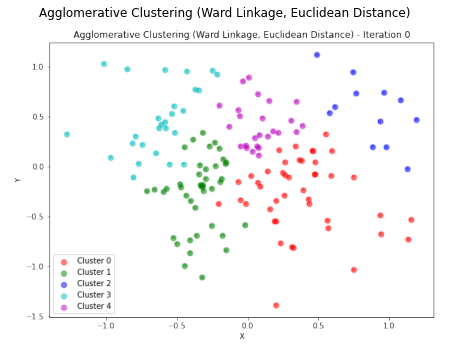

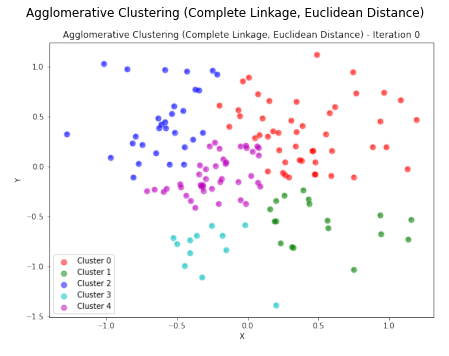

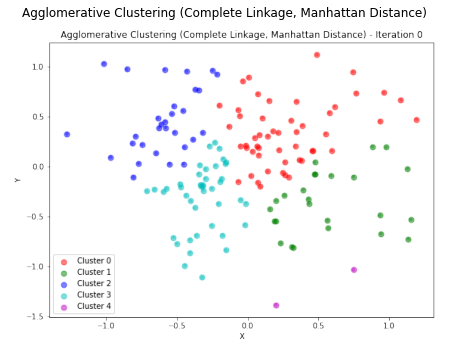

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
import imageio
import ipywidgets as widgets
from IPython.display import display

# Generate sparse random data points
np.random.seed(0)
data = np.random.randn(150, 2) * 0.5  # Adjusting the scale to make it sparse

# Number of clusters
k = 5

# Maximum number of iterations
max_iter = 10

# Define colors for clusters
colors = ['r', 'g', 'b', 'c', 'm']  # Adding more colors for 5 clusters

# Create a custom colormap for diffused colors
cmap = ListedColormap(colors)

# Define clustering algorithms and distance calculation methods
algorithms = ['single', 'complete', 'average', 'ward']
distance_methods = ['euclidean', 'manhattan', 'cosine']

# Create dropdown widgets for algorithm and distance method selection
algorithm_dropdown = widgets.Dropdown(options=algorithms, value='ward', description='Algorithm:')
distance_dropdown = widgets.Dropdown(options=distance_methods, value='euclidean', description='Distance Method:')
display(algorithm_dropdown, distance_dropdown)

# Plot clustering results for the selected algorithm and distance method
def plot_clustering(algorithm, distance_method):
    clustering = AgglomerativeClustering(n_clusters=k, linkage=algorithm, affinity=distance_method)
    clustering_labels = clustering.fit_predict(data)
    
    frames = []
    for iter in range(max_iter + 1):
        plt.figure(figsize=(8, 6))
        plt.title(f'Agglomerative Clustering ({algorithm.capitalize()} Linkage, {distance_method.capitalize()} Distance) - Iteration {iter}')
        plt.xlabel('X')
        plt.ylabel('Y')

        if iter > 0:
            clustering_labels = clustering.fit_predict(data)

        unique_labels = np.unique(clustering_labels)
        if len(unique_labels) > 1:
            for cluster_id in range(k):
                cluster_points = data[clustering_labels == cluster_id]
                plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster_id], alpha=0.5, s=50, label=f'Cluster {cluster_id}')
            plt.scatter(data[:, 0], data[:, 1], c=clustering_labels, cmap=cmap, alpha=0.4, s=20, edgecolors='none')
            plt.legend()

        plt.tight_layout()

        filename = f'frame_{algorithm}_{distance_method}_{iter}.png'
        plt.savefig(filename)
        plt.close()

        frames.append(imageio.imread(filename))

    gif_filename = f'agglomerative_clustering_animation_{algorithm}_{distance_method}.gif'
    imageio.mimsave(gif_filename, frames, duration=200)
    plt.figure(figsize=(8, 6))
    plt.title(f'Agglomerative Clustering ({algorithm.capitalize()} Linkage, {distance_method.capitalize()} Distance)')
    plt.axis('off')
    plt.imshow(frames[0])
    plt.show()

# Call the function to initially plot clustering results
plot_clustering(algorithm_dropdown.value, distance_dropdown.value)

# Update plot when dropdown values change
def on_dropdown_change(change):
    plot_clustering(algorithm_dropdown.value, distance_dropdown.value)

algorithm_dropdown.observe(on_dropdown_change, names='value')
distance_dropdown.observe(on_dropdown_change, names='value')


Dropdown(description='Algorithm:', index=3, options=('single', 'complete', 'average', 'ward'), value='ward')

Dropdown(description='Distance Method:', options=('euclidean', 'manhattan', 'cosine'), value='euclidean')

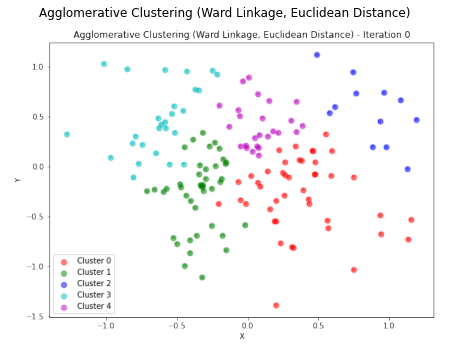

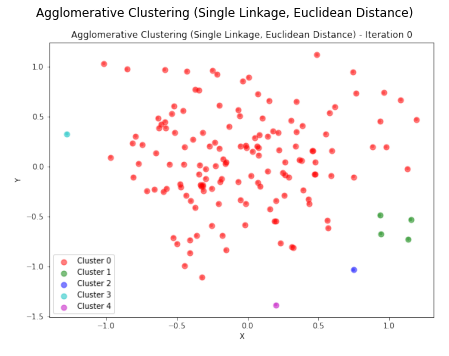

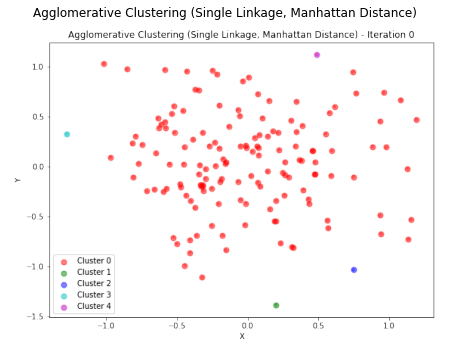

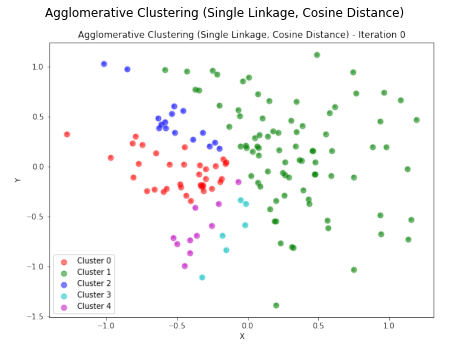

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
import imageio
import ipywidgets as widgets
from IPython.display import display

# Generate sparse random data points
np.random.seed(0)
data = np.random.randn(150, 2) * 0.5  # Adjusting the scale to make it sparse

# Number of clusters
k = 5

# Maximum number of iterations
max_iter = 10

# Define colors for clusters
colors = ['r', 'g', 'b', 'c', 'm']  # Adding more colors for 5 clusters

# Create a custom colormap for diffused colors
cmap = ListedColormap(colors)

# Define clustering algorithms and distance calculation methods
algorithms = ['single', 'complete', 'average', 'ward']
distance_methods = ['euclidean', 'manhattan', 'cosine']

# Create dropdown widgets for algorithm and distance method selection
algorithm_dropdown = widgets.Dropdown(options=algorithms, value='ward', description='Algorithm:')
distance_dropdown = widgets.Dropdown(options=distance_methods, value='euclidean', description='Distance Method:')
display(algorithm_dropdown, distance_dropdown)

# Plot clustering results for the selected algorithm and distance method
def plot_clustering(algorithm, distance_method):
    clustering = AgglomerativeClustering(n_clusters=k, linkage=algorithm, affinity=distance_method)
    clustering_labels = clustering.fit_predict(data)
    
    frames = []
    for iter in range(max_iter + 1):
        plt.figure(figsize=(8, 6))
        plt.title(f'Agglomerative Clustering ({algorithm.capitalize()} Linkage, {distance_method.capitalize()} Distance) - Iteration {iter}')
        plt.xlabel('X')
        plt.ylabel('Y')

        if iter > 0:
            clustering_labels = clustering.fit_predict(data)

        unique_labels = np.unique(clustering_labels)
        if len(unique_labels) > 1:
            for cluster_id in range(k):
                cluster_points = data[clustering_labels == cluster_id]
                plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster_id], alpha=0.5, s=50, label=f'Cluster {cluster_id}')
            plt.scatter(data[:, 0], data[:, 1], c=clustering_labels, cmap=cmap, alpha=0.4, s=20, edgecolors='none')
            plt.legend()

        plt.tight_layout()

        filename = f'frame_{algorithm}_{distance_method}_{iter}.png'
        plt.savefig(filename)
        plt.close()

        frames.append(imageio.imread(filename))

    gif_filename = f'agglomerative_clustering_animation_{algorithm}_{distance_method}.gif'
    imageio.mimsave(gif_filename, frames, duration=200)
    plt.figure(figsize=(8, 6))
    plt.title(f'Agglomerative Clustering ({algorithm.capitalize()} Linkage, {distance_method.capitalize()} Distance)')
    plt.axis('off')
    plt.imshow(frames[0])
    plt.show()

# Call the function to initially plot clustering results
plot_clustering(algorithm_dropdown.value, distance_dropdown.value)

# Update plot when dropdown values change
def on_dropdown_change(change):
    plot_clustering(algorithm_dropdown.value, distance_dropdown.value)

algorithm_dropdown.observe(on_dropdown_change, names='value')
distance_dropdown.observe(on_dropdown_change, names='value')


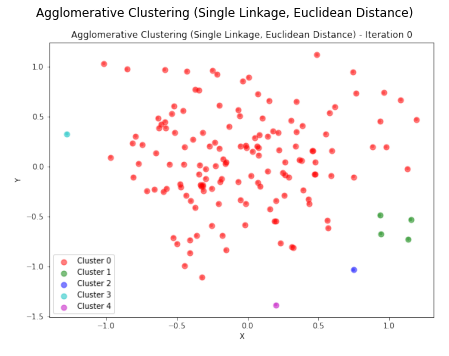

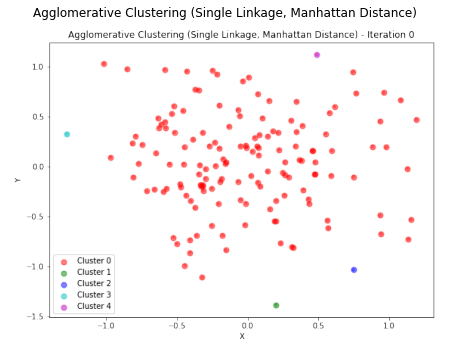

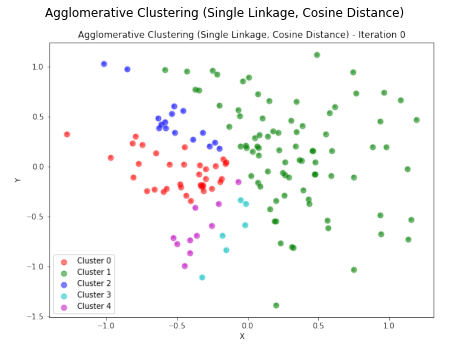

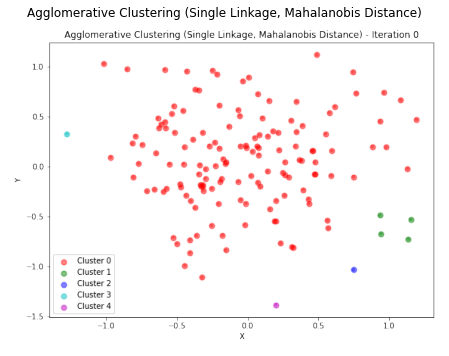

TypeError: minkowski_dist() missing 1 required positional argument: 'y'

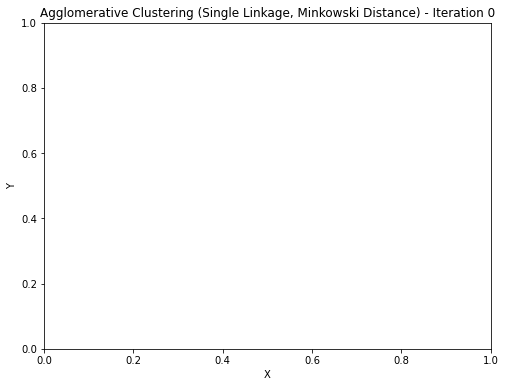

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
import imageio

# Generate sparse random data points
np.random.seed(0)
data = np.random.randn(150, 2) * 0.5  # Adjusting the scale to make it sparse

# Number of clusters
k = 5

# Maximum number of iterations
max_iter = 10

# Define colors for clusters
colors = ['r', 'g', 'b', 'c', 'm']  # Adding more colors for 5 clusters

# Create a custom colormap for diffused colors
cmap = ListedColormap(colors)

# Define clustering algorithms and distance calculation methods
algorithms = ['single', 'complete', 'average', 'ward']
distance_methods = ['euclidean', 'manhattan', 'cosine', 'mahalanobis', 'minkowski']

# Custom function for Minkowski distance
def minkowski_dist(x, y):
    p = 2  # Setting the parameter for Minkowski distance to p=2 (Euclidean distance)
    return np.linalg.norm(x - y, ord=p)

# Plot clustering results for each algorithm and distance method combination
for algorithm in algorithms:
    for distance_method in distance_methods:
        if distance_method == 'mahalanobis':
            # Calculate Mahalanobis distance matrix
            cov_matrix = np.cov(data.T)
            inv_cov_matrix = np.linalg.inv(cov_matrix)
            clustering = AgglomerativeClustering(n_clusters=k, linkage=algorithm, affinity='euclidean')
            clustering.labels_ = clustering.fit_predict(data)  # Override labels_ with the fitted labels
        elif distance_method == 'minkowski':
            clustering = AgglomerativeClustering(n_clusters=k, linkage=algorithm, affinity=minkowski_dist)
        else:
            clustering = AgglomerativeClustering(n_clusters=k, linkage=algorithm, affinity=distance_method)

        frames = []
        for iter in range(max_iter + 1):
            plt.figure(figsize=(8, 6))
            plt.title(f'Agglomerative Clustering ({algorithm.capitalize()} Linkage, {distance_method.capitalize()} Distance) - Iteration {iter}')
            plt.xlabel('X')
            plt.ylabel('Y')

            clustering.fit(data)
            clustering_labels = clustering.labels_

            unique_labels = np.unique(clustering_labels)
            if len(unique_labels) > 1:
                for cluster_id in range(k):
                    cluster_points = data[clustering_labels == cluster_id]
                    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster_id], alpha=0.5, s=50, label=f'Cluster {cluster_id}')
                plt.scatter(data[:, 0], data[:, 1], c=clustering_labels, cmap=cmap, alpha=0.4, s=20, edgecolors='none')
                plt.legend()

            plt.tight_layout()

            filename = f'frame_{algorithm}_{distance_method}_{iter}.png'
            plt.savefig(filename)
            plt.close()

            frames.append(imageio.imread(filename))

        gif_filename = f'agglomerative_clustering_animation_{algorithm}_{distance_method}.gif'
        imageio.mimsave(gif_filename, frames, duration=200)
        plt.figure(figsize=(8, 6))
        plt.title(f'Agglomerative Clustering ({algorithm.capitalize()} Linkage, {distance_method.capitalize()} Distance)')
        plt.axis('off')
        plt.imshow(frames[0])
        plt.show()


In [129]:
import numpy as np

class AgglomerativeClustering:
    def __init__(self, n_clusters, distance_func):
        self.n_clusters = n_clusters
        self.distance_func = distance_func

    def fit_predict(self, X):
        n_samples = X.shape[0]
        clusters = [[i] for i in range(n_samples)]

        while len(clusters) > self.n_clusters:
            min_distance = np.inf
            merge_indices = None

            for i in range(len(clusters)):
                for j in range(i + 1, len(clusters)):
                    distance = self.compute_distance(clusters[i], clusters[j], X)
                    if distance < min_distance:
                        min_distance = distance
                        merge_indices = (i, j)

            # Merge the two closest clusters
            merged_cluster = clusters[merge_indices[0]] + clusters[merge_indices[1]]
            del clusters[merge_indices[1]]
            del clusters[merge_indices[0]]
            clusters.append(merged_cluster)

        # Assign cluster labels to data points
        labels = np.zeros(n_samples, dtype=int)
        for i, cluster in enumerate(clusters):
            labels[cluster] = i

        return labels

    def compute_distance(self, cluster1, cluster2, X):
        distances = [self.distance_func(X[i], X[j]) for i in cluster1 for j in cluster2]
        return np.mean(distances)

# Define the Minkowski distance function
def minkowski_distance(x, y, p):
    return np.linalg.norm(x - y, ord=p)

# Example usage
np.random.seed(0)
data = np.random.randn(150, 2)

# Instantiate and fit AgglomerativeClustering with Minkowski distance
clustering = AgglomerativeClustering(n_clusters=5, distance_func=lambda x, y: minkowski_distance(x, y, p=1))
labels = clustering.fit_predict(data)
print(labels)


[2 2 1 3 3 3 3 3 3 3 4 3 1 3 2 3 3 3 2 3 3 4 3 4 4 3 3 3 3 3 3 3 3 4 4 3 1
 3 3 3 4 1 2 3 4 3 3 3 4 3 1 4 4 3 2 2 4 3 3 2 3 3 3 4 3 3 3 3 3 3 4 3 2 4
 3 4 3 3 1 3 4 3 4 3 3 3 3 4 3 3 3 3 1 4 4 4 3 3 2 2 3 2 1 3 3 3 3 3 3 2 3
 3 4 3 3 3 3 4 1 3 3 3 3 2 3 3 3 2 3 4 3 3 4 3 3 0 2 3 3 4 3 4 3 4 2 3 1 3
 3 3]


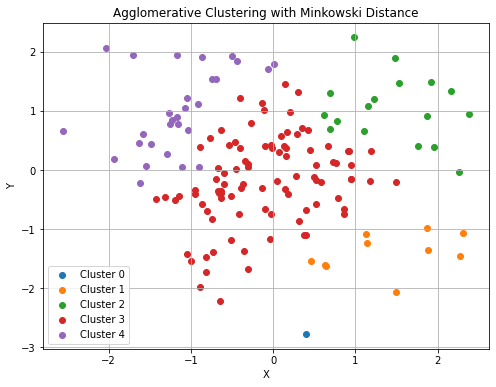

In [130]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Minkowski distance function
def minkowski_distance(x, y, p):
    return np.linalg.norm(x - y, ord=p)

# Define the AgglomerativeClustering class
class AgglomerativeClustering:
    def __init__(self, n_clusters, distance_func):
        self.n_clusters = n_clusters
        self.distance_func = distance_func

    def fit_predict(self, X):
        n_samples = X.shape[0]
        clusters = [[i] for i in range(n_samples)]

        while len(clusters) > self.n_clusters:
            min_distance = np.inf
            merge_indices = None

            for i in range(len(clusters)):
                for j in range(i + 1, len(clusters)):
                    distance = self.compute_distance(clusters[i], clusters[j], X)
                    if distance < min_distance:
                        min_distance = distance
                        merge_indices = (i, j)

            # Merge the two closest clusters
            merged_cluster = clusters[merge_indices[0]] + clusters[merge_indices[1]]
            del clusters[merge_indices[1]]
            del clusters[merge_indices[0]]
            clusters.append(merged_cluster)

        # Assign cluster labels to data points
        labels = np.zeros(n_samples, dtype=int)
        for i, cluster in enumerate(clusters):
            labels[cluster] = i

        return labels

    def compute_distance(self, cluster1, cluster2, X):
        distances = [self.distance_func(X[i], X[j], p=1) for i in cluster1 for j in cluster2]
        return np.mean(distances)

# Generate random data points
np.random.seed(0)
data = np.random.randn(150, 2)

# Instantiate and fit AgglomerativeClustering with Minkowski distance
clustering = AgglomerativeClustering(n_clusters=5, distance_func=minkowski_distance)
labels = clustering.fit_predict(data)

# Plot the clustered data points
plt.figure(figsize=(8, 6))
for i in range(clustering.n_clusters):
    cluster_points = data[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
plt.title('Agglomerative Clustering with Minkowski Distance')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


ValueError: Method 'ward' requires the distance metric to be Euclidean

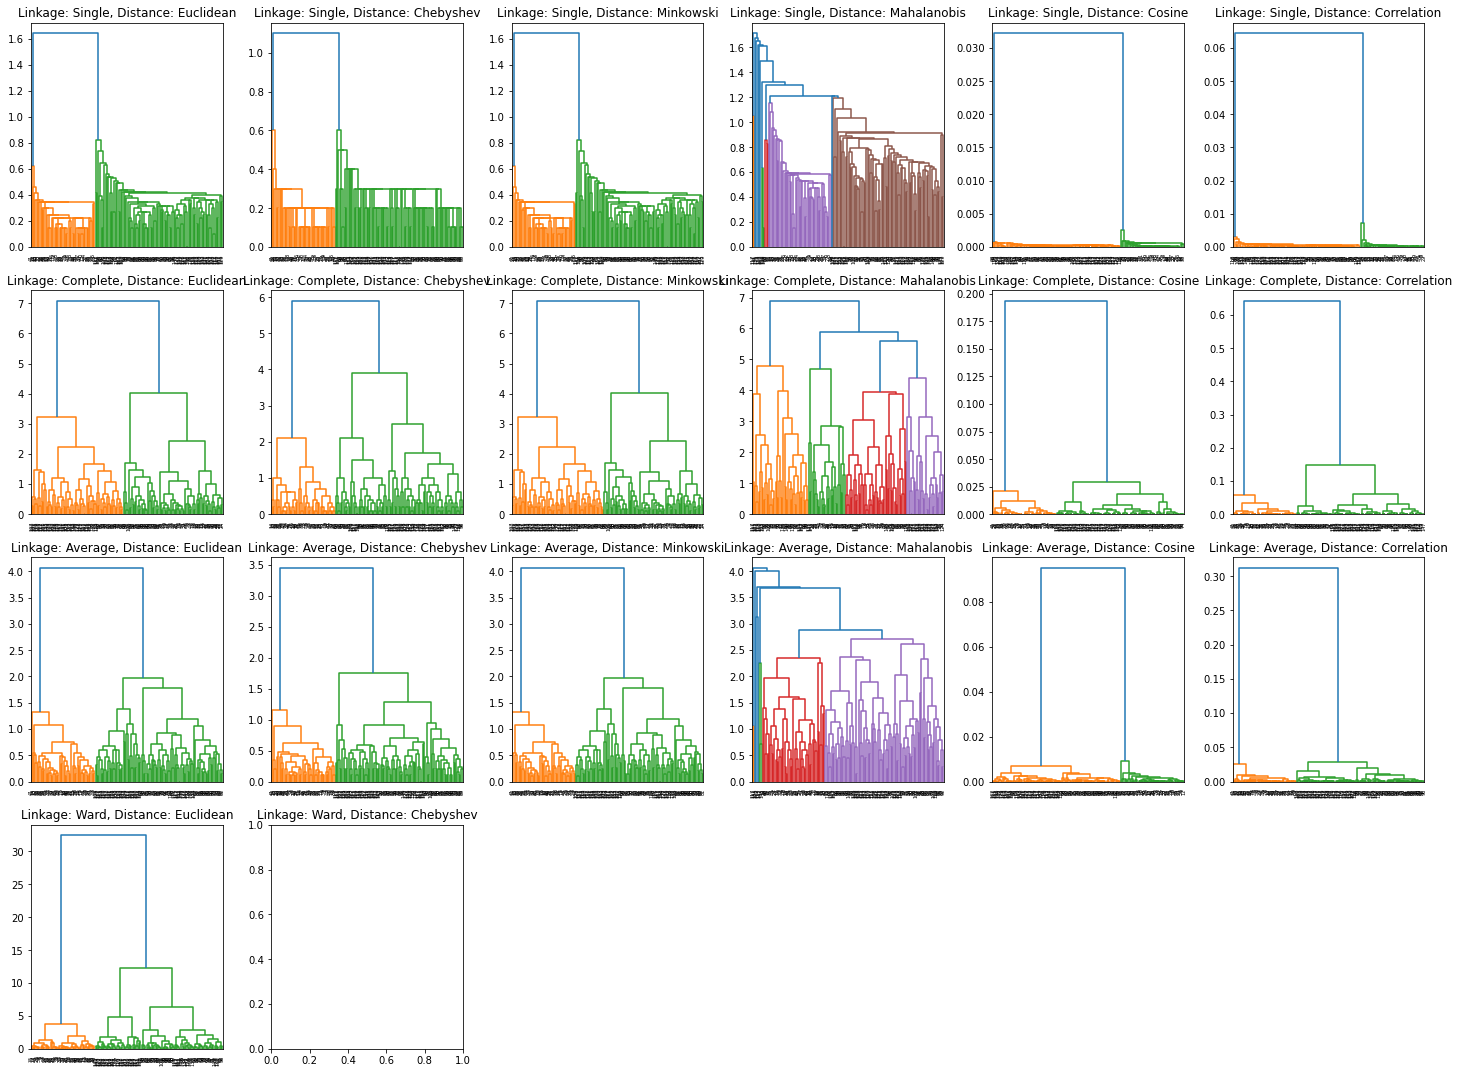

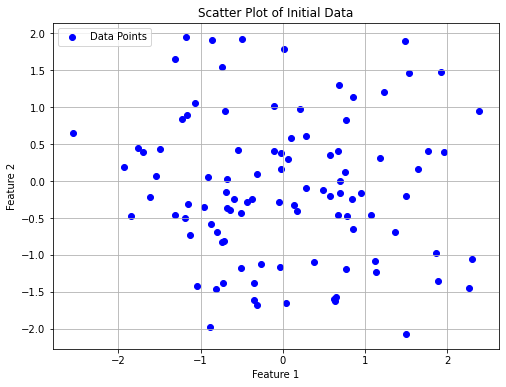

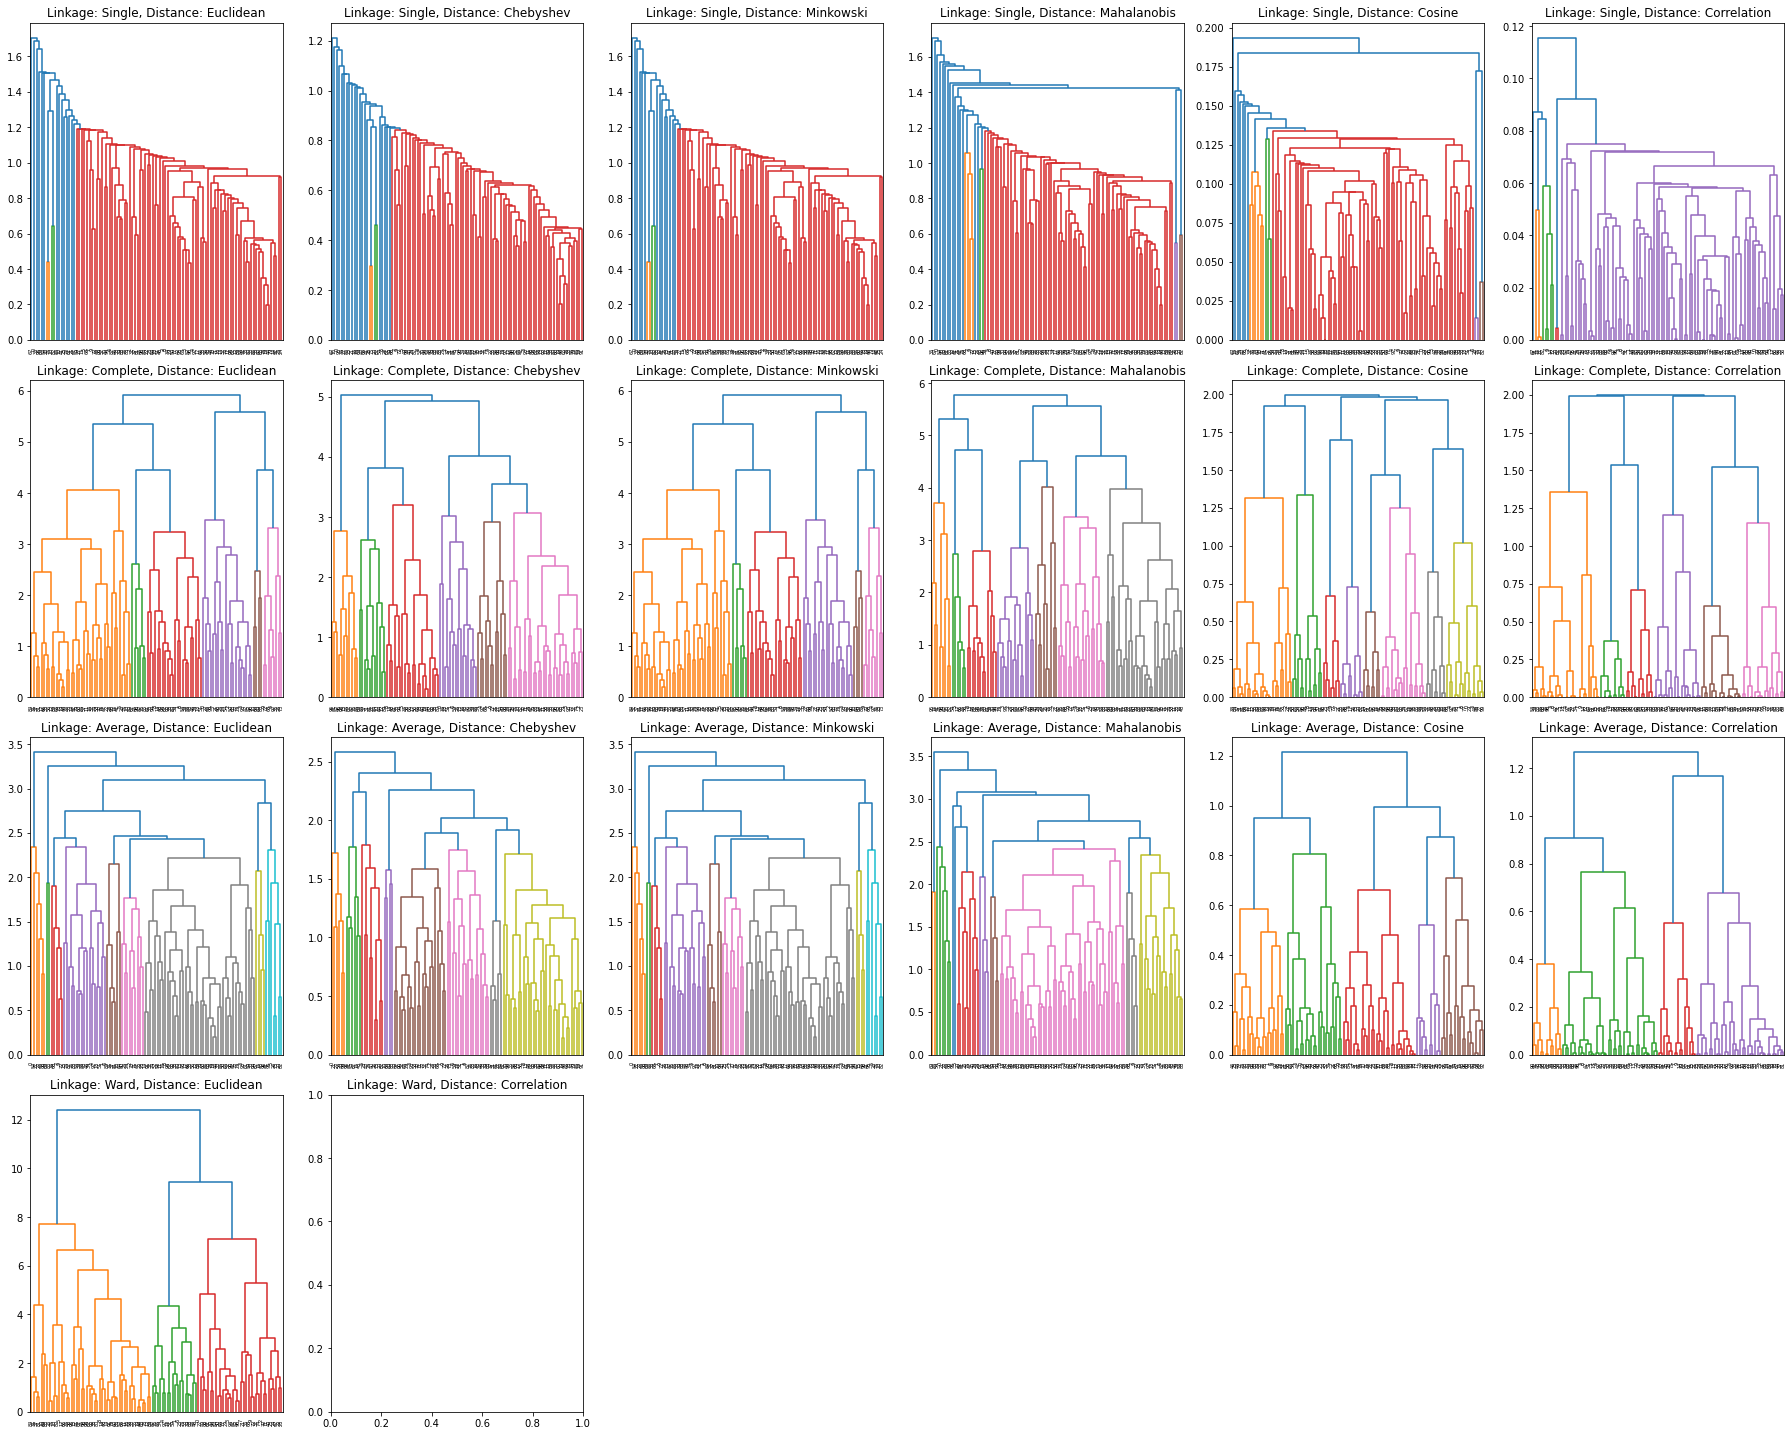

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate a random dataset with 100 samples and 4 features
np.random.seed(0)
data = np.random.randn(100, 4)

import matplotlib.pyplot as plt

# Plot the scatter plot of the initial data
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature1'], df['Feature2'], label='Data Points', color='blue')
plt.title('Scatter Plot of Initial Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Convert the dataset into a DataFrame for easier manipulation
df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])

# Separate features from the DataFrame
X = df.values

# Define different linkage methods and distance metrics
linkage_methods = ['single', 'complete', 'average', 'ward']
distance_metrics = ['euclidean', 'chebyshev', 'minkowski', 'mahalanobis', 'cosine', 'correlation']

# Plot dendrograms for each combination of linkage method and distance metric
plt.figure(figsize=(25, 20))  # Adjust the figsize here
plot_num = 1
for linkage_method in linkage_methods:
    for distance_metric in distance_metrics:
        plt.subplot(len(linkage_methods), len(distance_metrics), plot_num)
        plt.title(f'Linkage: {linkage_method.capitalize()}, Distance: {distance_metric.capitalize()}')
        if linkage_method == 'ward' and distance_metric != 'euclidean':
            continue
        elif distance_metric == 'mahalanobis':
            # Mahalanobis distance requires a covariance matrix
            cov_matrix = np.cov(X.T)
            inv_cov_matrix = np.linalg.inv(cov_matrix)
            dendrogram(linkage(X, method=linkage_method, metric=lambda u, v: np.sqrt(np.dot(np.dot((u - v), inv_cov_matrix), (u - v).T))))
        else:
            dendrogram(linkage(X, method=linkage_method, metric=distance_metric))
        plt.tight_layout()
        plot_num += 1

plt.show()


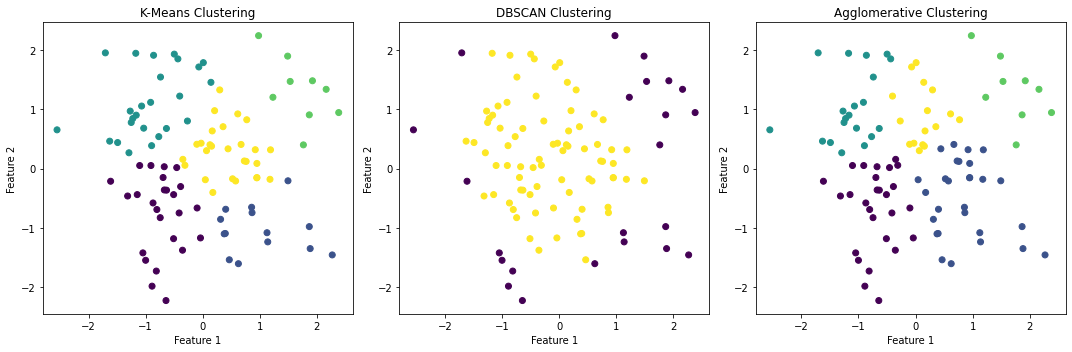

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Generate random data
np.random.seed(0)
X = np.random.randn(100, 2)

# Create a DataFrame
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(df[['Feature1', 'Feature2']])

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df[['Feature1', 'Feature2']])

# Perform Agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=5)
agglomerative_labels = agglomerative.fit_predict(df[['Feature1', 'Feature2']])

# Plot the results of different clustering methods
plt.figure(figsize=(15, 5))

# K-means clustering
plt.subplot(131)
plt.scatter(df['Feature1'], df['Feature2'], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# DBSCAN clustering
plt.subplot(132)
plt.scatter(df['Feature1'], df['Feature2'], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Agglomerative clustering
plt.subplot(133)
plt.scatter(df['Feature1'], df['Feature2'], c=agglomerative_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()
